In [2]:
import pandas as pd
import numpy as np
from scipy.stats import binom, norm, poisson, nbinom, cauchy
import matplotlib.pyplot as plt
import math
import statistics 

[Text(0,0.5,'Likelihood'),
 Text(0.5,0,'theta'),
 Text(0.5,1,'(d) Normal means examples')]

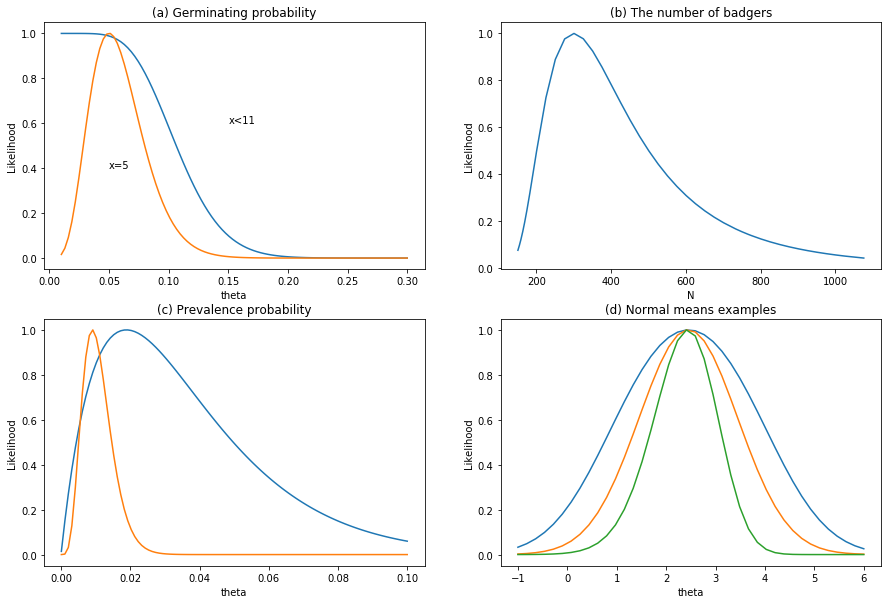

In [3]:
## EX 2 all plots and functions
# EX 2-1 (a) censored data

theta=np.linspace(0.01,0.3,100)
like=binom.cdf(10,100,theta)
like11=like/np.max(like)

like=binom.pmf(5,100,theta)
like12=like/np.max(like)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2,ncols=2,figsize=(15,10))

ax1.plot(theta, like11)
ax1.plot(theta, like12)
ax1.set(xlabel="theta", ylabel="Likelihood",title="(a) Germinating probability")
ax1.text(0.05,0.4,'x=5')
ax1.text(0.15,0.6,'x<11')


# EX 2-2 (b) badgers

n=25
k=60
n1=5
NN=[[i+1 for i in range(200) if i> 149 and i % 1 == 0],
    [i+1 for i in range(725) if i> 199 and i % 25 == 0],
    [i+1 for i in range(775) if i> 724 and i % 1 == 0],
    [i+1 for i in range(1100) if i> 774 and i % 25 == 0]]
NN=[item for sublist in NN for item in sublist]

def loglike_f(i): 
    return(math.lgamma(i-n+1)-math.lgamma(i-n-k+n1+1)-math.lgamma(i+1)+math.lgamma(i-k+1))

loglike_vec=np.vectorize(loglike_f)
loglik2=loglike_vec(NN)
like2=np.exp(loglik2-np.max(loglik2))


ax2.plot(NN, like2)
ax2.set(xlabel="N", ylabel="Likelihood",title="(b) The number of badgers")

# EX 2-3

theta=np.linspace(.0001,.1,100)
like=binom.pmf(1,53,theta)
like31=like/np.max(like)

like=binom.pmf(5,552,theta)
like32=like/np.max(like)

ax3.plot(theta, like31)
ax3.plot(theta, like32)
ax3.set(xlabel="theta", ylabel="Likelihood",title="(c) Prevalence probability")

# EX 2-4
theta=np.linspace(-1,6,40)
like=norm.cdf(4,theta)-norm.cdf(.9,theta)
like41=like/np.max(like)

like=norm.pdf(2.45,theta)
like42=like/np.max(like)

n=5
xn=3.5
def llike_f(theta):
    return np.log(norm.pdf(xn,theta))+(n-1)*np.log(norm.cdf(xn,theta))

llike_vec=np.vectorize(llike_f)
like43=llike_vec(theta)
like43=np.exp(like43-np.max(like43))

ax4.plot(theta, like41)
ax4.plot(theta, like42)
ax4.plot(theta, like43)
ax4.set(xlabel="theta", ylabel="Likelihood",title="(d) Normal means examples")

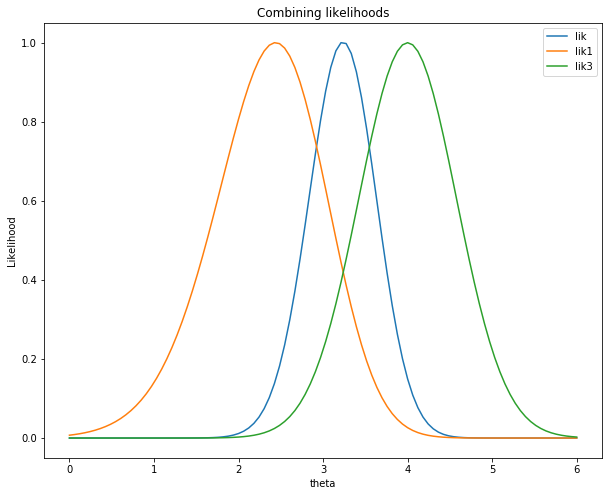

In [4]:
# EX 2-7
theta=np.linspace(0,6,100)
n=5
x=3.5

# sample 1: data max=3.5 from x1 to x5 iid N(theta,1)
loglik1=(n-1)*np.log(norm.cdf(x-theta)) + np.log(norm.pdf(x-theta))
loglik1=loglik1 - np.max(loglik1)
lik1=np.exp(loglik1)

# sample2: ybar from y1 to y3 iid N(theta,1)
n=3
ybar=4
loglik2=np.log(norm.pdf(ybar,loc=theta,scale=np.sqrt(1/n)))
loglik2=loglik2-np.max(loglik2)
lik2=np.exp(loglik2)

# combined sample
loglik=loglik1+loglik2
loglik=loglik-np.max(loglik)
lik=np.exp(loglik)


fig, ax1 = plt.subplots(nrows=1,ncols=1,figsize=(10,8))

ax1.plot(theta, lik)
ax1.plot(theta, lik1)
ax1.plot(theta, lik2)
ax1.set(xlabel="theta", ylabel="Likelihood",title="Combining likelihoods")
ax1.legend(['lik', 'lik1','lik3'])

In [5]:
# EX 2-11

n=5
xn=3.5

# minus log-likelihood function 
def llike(theta):
    return -np.log(norm.pdf(xn,loc=theta)) - (n-1)*np.log(norm.cdf(xn,loc=theta))

# nonlinear optimization, starting with 3.5
# the estimate is given by out$est
# the Fisher information is given by the Hessian term: out$hess

from scipy.optimize import minimize

out=minimize(llike, np.array([0]))
#result
print('Optimized value: ',out.x[0])
print('Hessian: ',1/out.hess_inv[0][0])

Optimized value:  2.4384844487769746
Hessian:  2.402574628858195


(-2.5, 2.5)

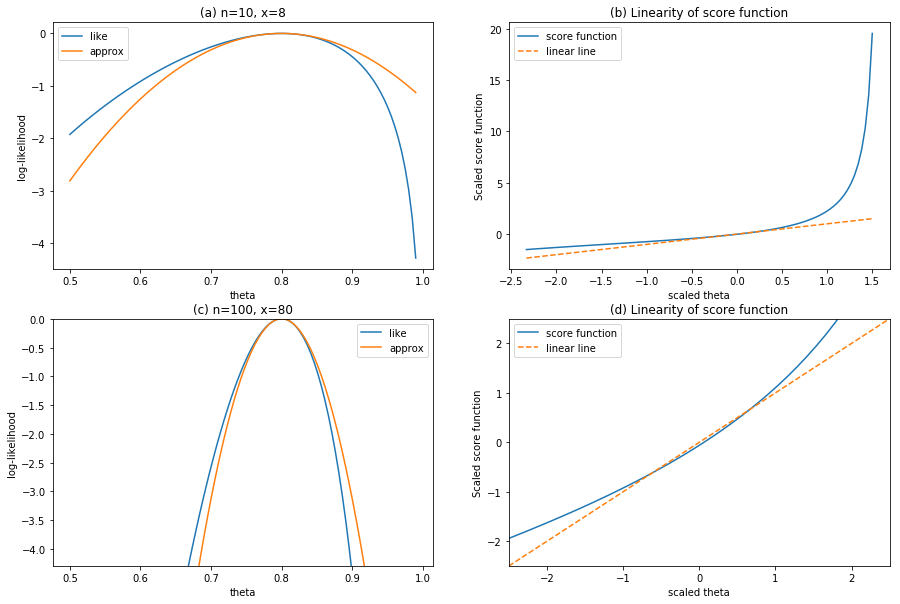

In [6]:
# EX 2-12

x=8;n=10
theta=np.linspace(0.5,.99,100)

like=binom.pmf(8,10,theta)
like1=like/np.max(like)
ll=np.log(like1)

that=x/n
ihat=n/that/(1-that)
la=-ihat/2*(theta-that)**2
ra=np.array(np.min(ll),np.max(ll))

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2,ncols=2,figsize=(15,10))

ax1.plot(theta, ll)
ax1.plot(theta, la)
ax1.set(xlabel="theta", ylabel="log-likelihood",title="(a) n=10, x=8")
ax1.legend(['like','approx'])


sco=-1/np.sqrt(ihat)*np.diff(ll)/np.diff(theta)
the=np.sqrt(ihat)*(theta[1:]-that)

ax2.plot(the, sco)
ax2.set(xlabel="scaled theta", ylabel="Scaled score function",title="(b) Linearity of score function")


def abline(intercept,slope,the,ax):
    x_vals = the
    y_vals = intercept + slope * x_vals
    ax.plot(x_vals, y_vals, '--')

abline(0,1,the,ax2)
ax2.legend(['score function','linear line'])

## ricontrolla
x=80;n=100
theta=np.linspace(0.5,.99,100)
ll=x*np.log(theta) + (n-x)*np.log(1-theta)

ll=ll-np.max(ll)
that=x/n
ihat=n/that/(1-that)
la=-ihat/2*(theta-that)**2


ax3.plot(theta, ll)
ax3.plot(theta, la)
ax3.set(xlabel="theta", ylabel="log-likelihood",title="(c) n=100, x=80")
ax3.legend(['like','approx'])
ax3.set_ylim([-4.29, 0])

sco=-1/np.sqrt(ihat)*np.diff(ll)/np.diff(theta)
the=np.sqrt(ihat)*(theta[1:]-that)

ax4.plot(the, sco)
ax4.set(xlabel="scaled theta", ylabel="Scaled score function",title="(d) Linearity of score function")
abline(0,1,the,ax4)
ax4.legend(['score function','linear line'])
ax4.set_ylim([-2.5, 2.5]);ax4.set_xlim([-2.5, 2.5])

cutoff = 0.04 Interval = [array(0.40774369), array(0.98288015)] 

cutoff = 0.15 Interval = [array(0.50244961), array(0.9632811)] 



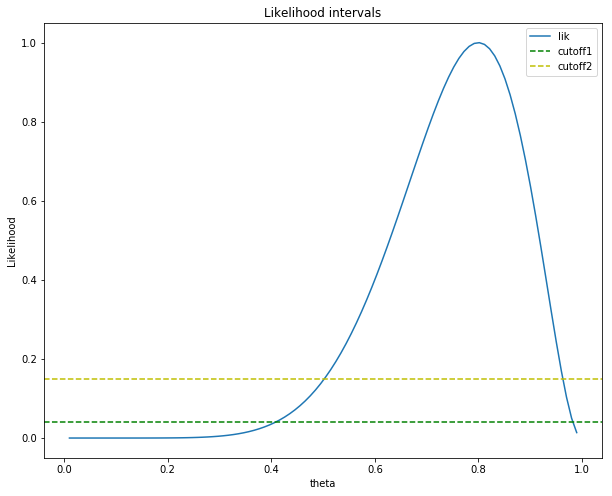

In [7]:
# EX 2-13
from scipy import interpolate

# computing likelihood intervals at certain alpha levels
def li(th,like,alpha=0.15):
    that=np.mean(th[like==np.max(like)])
    lowth=th[th < that]  
    lowlik=like[th < that] 
    if (len(lowth)<2):
        lowval=np.min(th)
    if (len(lowth)>1):
        lowval_f=interpolate.interp1d(lowlik,lowth)
        lowval=lowval_f(alpha)
    upth=th[th > that]
    if (len(upth)<2):
        return [lowval,np.max(th)]
    if (len(upth)>1):
        uplik=like[th > that]
        upval_f=interpolate.interp1d(uplik,upth)
        upval=upval_f(alpha)
        return [lowval,upval]

th=np.linspace(0.01,.99,100)
x=8
n=10
like=binom.pmf(x,n,th)
like=like/np.max(like)


_, ax1 = plt.subplots(nrows=1,ncols=1,figsize=(10,8))

ax1.plot(th, like)
ax1.set(xlabel="theta", ylabel="Likelihood",title="Likelihood intervals")
ax1.axhline(y=0.04, color='g', linestyle='--')
ax1.axhline(y=0.15, color='y', linestyle='--')
ax1.legend(['lik', 'cutoff1','cutoff2'])

cutoffs=[0.04, 0.15]
for c in cutoffs:
    print('cutoff =',c, 'Interval =', li(th,like,c),'\n')

#li(th,like,0.04)


min =  2.8512512512512513 , max =  5.19039039039039


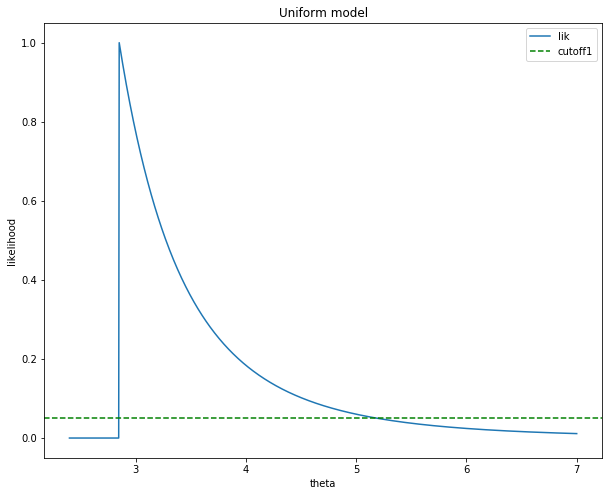

In [8]:
# EX 2-15

n=5
x=[2.85,1.51,0.69,0.57,2.29]
theta=np.linspace(2.4,7,1000)
like=[th**(-n) if th>np.max(x) else 0.0 for th in theta]
like=like/np.max(like)
a=theta[like>.05]
print('min = ',np.min(a),', max = ',np.max(a))

_, ax1 = plt.subplots(nrows=1,ncols=1,figsize=(10,8))
ax1.plot(theta, like)
ax1.set(xlabel="theta", ylabel="likelihood",title="Uniform model")
ax1.axhline(y=0.05, color='g', linestyle='--')
ax1.legend(['lik', 'cutoff1'])


min =  0.0 , max =  0.1393939393939394
min =  0.021212121212121213 , max =  0.10303030303030303


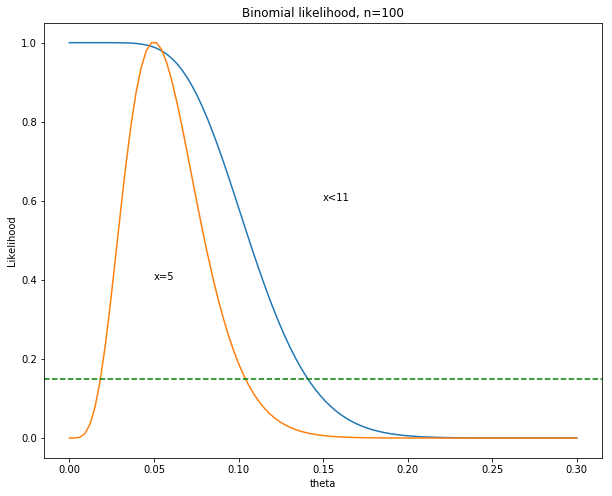

In [9]:
# EX 2-16


# censored data:
theta=np.linspace(.0,.3,100)
like=binom.cdf(10,100,theta)
like1=like/np.max(like)

a=theta[like1>.15]
print('min = ',np.min(a),', max = ',np.max(a))

like=binom.pmf(5,100,theta)
like2=like/np.max(like)
b=theta[like2>.15]
print('min = ',np.min(b),', max = ',np.max(b))


_, ax1 = plt.subplots(nrows=1,ncols=1,figsize=(10,8))

ax1.plot(theta, like1)
ax1.plot(theta, like2)
ax1.set(xlabel="theta", ylabel="Likelihood",title="Binomial likelihood, n=100")
ax1.text(0.05,0.4,'x=5')
ax1.text(0.15,0.6,'x<11')
ax1.axhline(y=0.15, color='g', linestyle='--')

min =  0.5072727272727273 , max =  0.9602020202020202


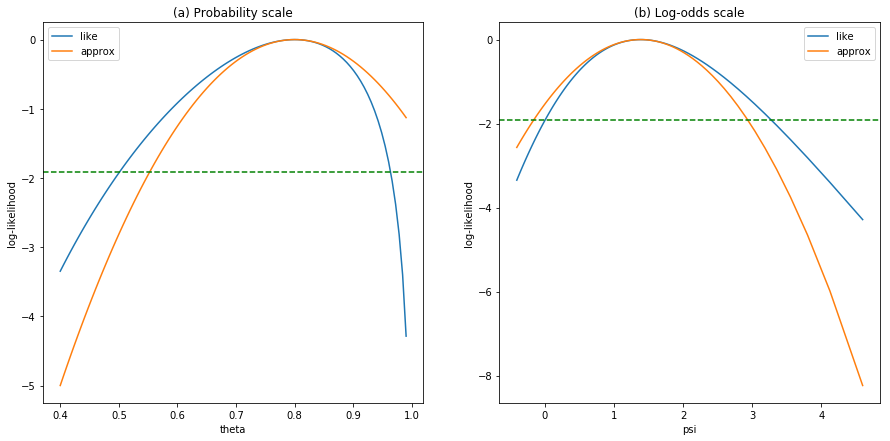

In [10]:
# EX 2-18

x=8;n=10

theta=np.linspace(0.4,.99,100)
like=binom.pmf(8,10,theta)
like1=like/np.max(like)
ll=np.log(like1)
a=theta[like1>.15]
print('min = ',np.min(a),', max = ',np.max(a))

that=x/n
ihat=n/that/(1-that)
la=-ihat/2*(theta-that)**2
ra=[np.min(ll),np.max(ll)]


_, ((ax1, ax2)) = plt.subplots(nrows=1,ncols=2,figsize=(15,7))

ax1.plot(theta, ll)
ax1.plot(theta, la)
ax1.set(xlabel="theta", ylabel="log-likelihood",title="(a) Probability scale")
ax1.legend(['like','approx'])
ax1.axhline(y=-1.92, color='g', linestyle='--')

psi=np.log(theta)-np.log(1-theta)
psihat=np.log(that)-np.log(1-that)
ihat=x*(n-x)/n
lpsi=-ihat/2*(psi-psihat)**2

ax2.plot(psi, ll)
ax2.plot(psi, lpsi)
ax2.set(xlabel="psi", ylabel="log-likelihood",title="(b) Log-odds scale")
ax2.legend(['like','approx'])
ax2.axhline(y=-1.92, color='g', linestyle='--')

In [11]:
# EX 3-9

# Section 9-10
# Logistic model
x=[50, 50, 51, 53, 54, 54, 54, 55, 55, 56, 56, 57, 57, 57, 57, 58, 59, 60, 60, 61, 61, 61, 61, 62, 62, 62, 62, 63, 63, 63, 64, 64, 65, 67, 67, 68, 68, 69, 70, 71]
y=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0]
n=len(y)

# Import pandas library
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
from numpy  import *

# glm
x0=x-np.mean(x)
data = {'y': y,'x0': x0}
df = pd.DataFrame(data)

formula='y~x0'
xglm = smf.glm(formula=formula, data=df, family=sm.families.Binomial())

# Computing covariance matrix:
ones_vector=np.ones((n,1))
x0=x0.reshape(len(x0), 1)

X=np.hstack((ones_vector,x0)) # design matrix
p=xglm.fit()   # fitted probabilities
W=p.fittedvalues*(1-p.fittedvalues)    # weight vector
W=W.reshape(len(W), 1)
XW=np.multiply(X,W)
XWX=np.transpose(XW) @ X
print('The covariance matrix:','\n',np.linalg.inv(XWX))
print('The smf covariance matrix:','\n',p.cov_params())


c:\Users\Nicolo-pc\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


The covariance matrix: 
 [[ 0.13520899 -0.00627764]
 [-0.00627764  0.00526934]]
The smf covariance matrix: 
            Intercept        x0
Intercept   0.135209 -0.006278
x0         -0.006278  0.005269


c:\Users\Nicolo-pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


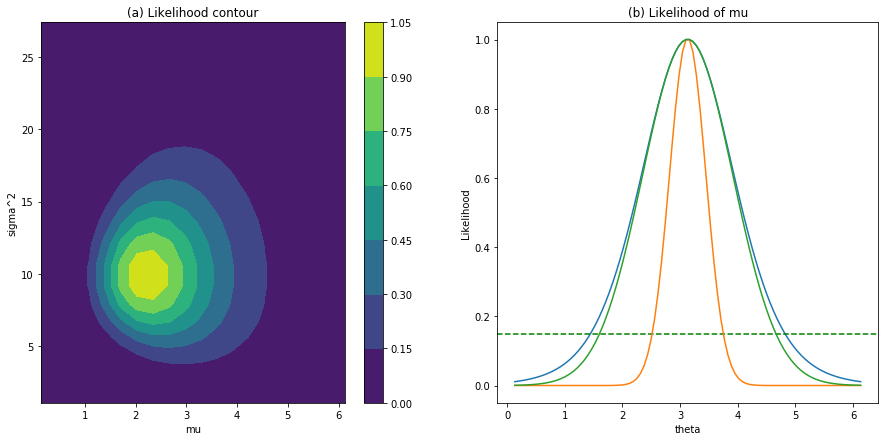

In [12]:
## EX 3-10

x=[0.88,1.07,1.27,1.54,1.91,2.27,3.84,4.5,4.64,9.41]
x=np.array(x)
n=len(x)

def fun0(mu,sigma,n):
  a=-n/2*np.log(sigma**2)-(np.sum(x**2)-2*mu*np.sum(x) + n*mu**2)/(2*sigma**2)
  return -a


ll=None
n_p=20
mu=np.linspace(np.mean(x)-3,np.mean(x)+3,n_p)
sx=np.sqrt(statistics.variance(x))
sigma=np.linspace(sx/2.5,sx*2,n_p)
ll2=np.zeros((len(mu),len(sigma)))
for i in range(len(mu)):
  for j in range(len(sigma)):
    ll2[i,j]=fun0(mu[i],sigma[j],n)

like2=np.exp(np.min(ll2)-ll2)

# plots
fig, ((ax1, ax2)) = plt.subplots(nrows=1,ncols=2,figsize=(15,7))
cp = ax1.contourf(mu,sigma**2,like2)
fig.colorbar(cp, ax=ax1) # Add a colorbar to a plot
ax1.set_title('(a) Likelihood contour')
ax1.set_xlabel('mu')
ax1.set_ylabel('sigma^2')
#plt.show()

n_p=100
mu=np.linspace(mean(x)-3,mean(x)+3,n_p)

ll=np.zeros(n_p)
for i in range(n_p):
  shat2=np.sum((x-mu[i])**2)/n
  lli=-n/2*np.log(shat2)
  ll[i]=lli


like=np.exp(ll-np.max(ll))

# plots

ax2.plot(mu, like)
ax2.set(xlabel="theta", ylabel="Likelihood",title="(b) Likelihood of mu")
ax2.axhline(y=.15, color='g', linestyle='--')

ll=fun0(mu,1,n)
like=np.exp(np.min(ll)-ll)
ax2.plot(mu, like)

se=np.sqrt(statistics.variance(x)*(n-1)/n)/np.sqrt(n)
xbar=mean(x)
elike=norm.pdf(xbar,mu,se)
elike=elike/np.max(elike)
ax2.plot(mu, elike)


[array(0.50050703), array(0.9637903)]


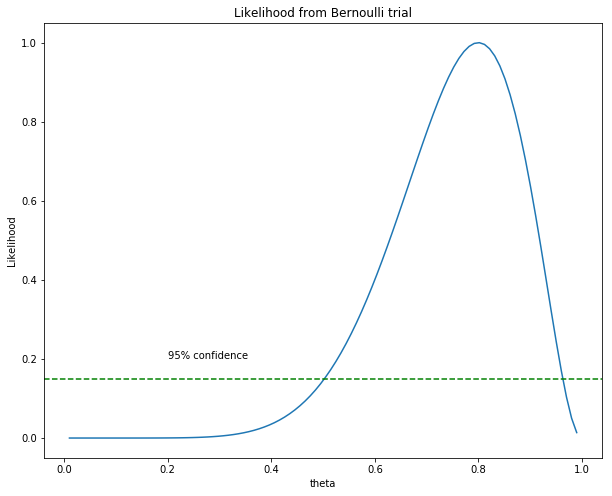

In [13]:
## EX 4-1

x=8;n=10

theta=np.linspace(0.01,.99,100)
like=binom.pmf(8,10,theta)
like1=like/np.max(like)
print(li(theta,like1,np.exp(-1.92)))

_, ax1 = plt.subplots(nrows=1,ncols=1,figsize=(10,8))
ax1.plot(theta, like1)
ax1.set(xlabel="theta", ylabel="Likelihood",title="Likelihood from Bernoulli trial")
ax1.text(.2,.2,'95% confidence')
ax1.axhline(y=0.15, color='g', linestyle='--')


In [14]:
## EX 4-2

k=[0,1,2,3,4,5,6,7,8,9,10,11,12]
k=np.array(k)
nk=[3, 24, 104, 286, 670, 1033, 1343, 1112, 829, 478, 181, 45, 7]
nk=np.array(nk)
N=np.sum(nk)
pk=nk/N

th=np.sum(np.multiply(k,pk))/12
ihat=np.sum(k*nk)/th**2 + np.sum((12-k)*nk)/(1-th)**2
se=np.sqrt(1/ihat)
print('est=',th,'se=',se,'\n')


est= 0.5192150449713818 se= 0.0018444216651607962 



In [15]:
## EX 4-3


# Example 4.3
k=[0,1,2,3,4,5,6,7,8,9,10,11,12]
nk=[3, 24, 104, 286, 670, 1033, 1343,1112,829,478,181,45,7]
k=np.array(k)
nk=np.array(nk)
N=np.sum(nk)
pk=nk/N
th=np.sum(np.multiply(k,pk))/12

#s2=np.sum((pk*np.power(k-12*th),2))  
#  print(s2,12*th*(1-th),'\n')  # observed variance vs binomial variance

# residuals:
est=N*binom.pmf(k,12,th)     # expected frequencies

chi2=np.sum(np.power(nk-est,2)/est)
print(chi2,(1-norm.cdf(chi2,11)),'\n')

res=(nk-est)/np.sqrt(est)
print('Obs =',nk,'\n','Exp =',np.round(est),'\n','Residual =',np.round(res,1))


110.50495839413257 0.0 

Obs = [   3   24  104  286  670 1033 1343 1112  829  478  181   45    7] 
 Exp = [1.000e+00 1.200e+01 7.200e+01 2.580e+02 6.280e+02 1.085e+03 1.367e+03
 1.266e+03 8.540e+02 4.100e+02 1.330e+02 2.600e+01 2.000e+00] 
 Residual = [ 2.1  3.4  3.8  1.7  1.7 -1.6 -0.7 -4.3 -0.9  3.4  4.2  3.7  3. ]


theta-hat= 1.5040773967762742 ,  se= 1.1879019787470309 

0.3723855901148279
95% CI for theta= [array(-0.54443637), array(4.52424251)] 

Likelihood of theta=0 0.025223570464514004 

lower limit of 15% likelihood interval for theta= 0.93400539556346 



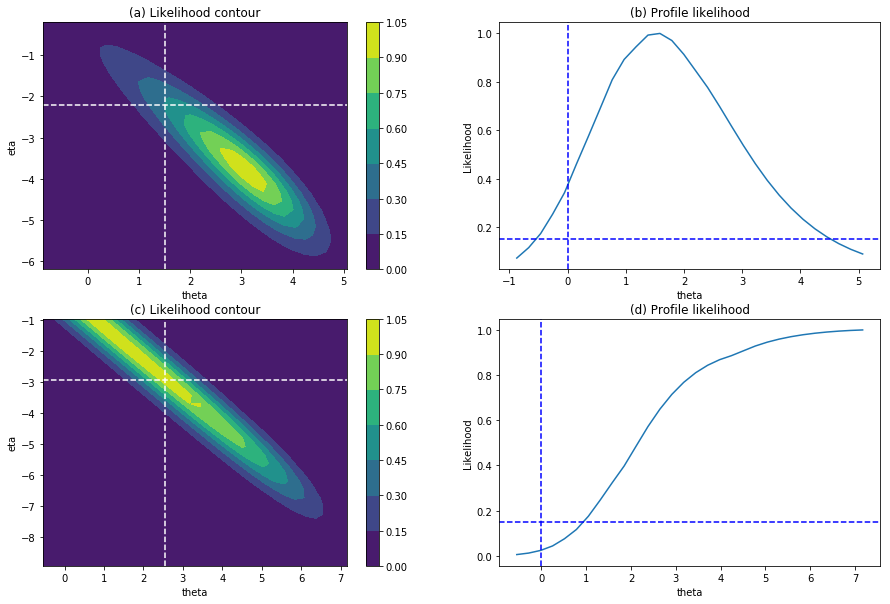

In [16]:
## EX 4-4

x=5; m=15
y=1; n=10

that=np.log(x/(m-x)*(n-y)/y)
se2=1/x + 1/(m-x) + 1/y + 1/(n-y)
se=np.sqrt(se2)

ehat=np.log(y/(n-y))
print('theta-hat=',that,',  se=',se,'\n')

th=np.linspace(that-2*se,that+3*se,30)
et=np.linspace(ehat-4,ehat+2,30)

def fun1(theta,eta,n,m):
  a=np.exp(theta+eta)
  b=np.exp(eta)
  return x*theta + (x+y)*eta - m*np.log(1+a) - n*np.log(1+b)

ll=np.zeros((len(th),len(et)))
for i in range(len(th)): # outer
  for j in range(len(et)):
    ll[i,j]=fun1(th[i],et[j],n,m)

like=np.exp(ll-np.max(ll))

# plots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2,ncols=2,figsize=(15,10))

cp = ax1.contourf(th,et,like)
fig.colorbar(cp, ax=ax1) # Add a colorbar to a plot
ax1.set_title('(a) Likelihood contour')
ax1.set_xlabel('theta')
ax1.set_ylabel('eta')
ax1.axhline(y=ehat, color='w', linestyle='--')
ax1.axvline(x=that, color='w', linestyle='--')


lik1=np.apply_along_axis(np.max,1,like)

ax2.plot(th, lik1)
ax2.set(xlabel="theta", ylabel="Likelihood",title="(b) Profile likelihood")
ax2.axhline(y=.15, color='b', linestyle='--')
ax2.axvline(x=0, color='b', linestyle='--')

# getting likelihood of H0
a_f=interpolate.interp1d(th,lik1)
a=a_f(0)
print(a)

# getting likelihood interval
a=li(th,lik1,0.15)
print('95% CI for theta=',a,'\n')


# ................... more extreme table
x=6; m=15
y=0; n=10

y=0.5 # only to get estimates for plotting purpose
that=np.log(x/(m-x)*(n-y)/y)
se2=1/x + 1/(m-x) + 1/y + 1/(n-y)
se=np.sqrt(se2)

ehat=np.log(y/(n-y))

th=np.linspace(that-2*se,that+3*se,30)
et=np.linspace(ehat-6,ehat+2,30)

y=0 # the actual value of y
ll=np.zeros((len(th),len(et)))
for i in range(len(th)): # outer
  for j in range(len(et)):
    ll[i,j]=fun1(th[i],et[j],n,m)

like=np.exp(ll-np.max(ll))

cp = ax3.contourf(th,et,like)
fig.colorbar(cp, ax=ax3) # Add a colorbar to a plot
ax3.set_title('(c) Likelihood contour')
ax3.set_xlabel('theta')
ax3.set_ylabel('eta')
ax3.axhline(y=ehat, color='w', linestyle='--')
ax3.axvline(x=that, color='w', linestyle='--')

lik1=np.apply_along_axis(np.max,1,like)

ax4.plot(th, lik1)
ax4.set(xlabel="theta", ylabel="Likelihood",title="(d) Profile likelihood")
ax4.axhline(y=.15, color='b', linestyle='--')
ax4.axvline(x=0, color='b', linestyle='--')

# likelihood of theta=0
a_f=interpolate.interp1d(th,lik1)
a=a_f(0)
print('Likelihood of theta=0',a,'\n')

# lower bound
a=li(th,lik1,0.15)
print('lower limit of 15% likelihood interval for theta=',a[0],'\n')


mean= 2.8 

se  = 0.7483314773547882 

95% CI= [array(1.58302292), array(4.52142193)] 



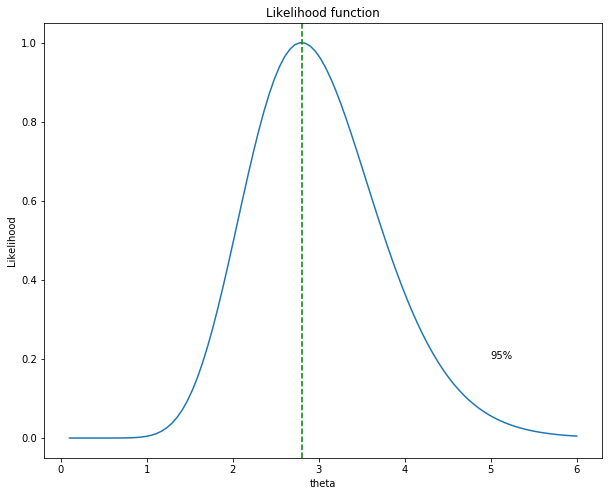

In [17]:
## EX 4-5

x=[3, 2, 5, 0 ,4]
x=np.array(x)
n=len(x)

mu=np.linspace(.1,6,100)
ll=-n*mu + np.sum(x)*np.log(mu)
like=np.exp(ll-np.max(ll))


_, ax1 = plt.subplots(nrows=1,ncols=1,figsize=(10,8))
ax1.plot(mu,like)
ax1.set(xlabel="theta", ylabel="Likelihood",title="Likelihood function")
ax1.text(5,.2,'95%')
ax1.axvline(x=np.mean(x), color='g', linestyle='--')

print('mean=',np.mean(x),'\n')
print('se  =',np.sqrt(np.mean(x)/n),'\n')
print('95% CI=',li(mu,like,.15),'\n')


mle = 0.8421052631578947 ,  95% CI= [array(0.65331883), array(1.06428624)] 

mle = 0.6933333333333334 ,  95% CI= [array(0.52249479), array(0.89795495)] 

note: 0.53< theta <0.96 in the book is wrong. Should be 0.53<theta<0.90. 



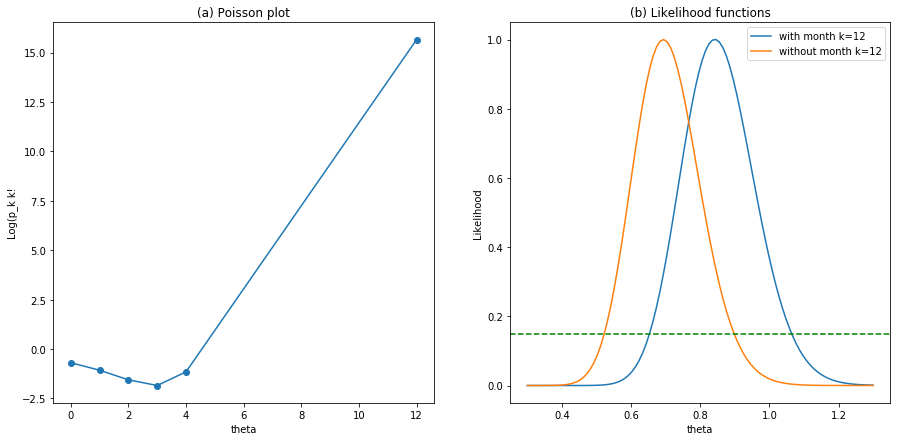

In [18]:
## EX 4-6


k=[0,1,2,3,4,12];k=np.array(k)
nk=[38,26,8,2,1,1];nk=np.array(nk)

def kfac(x):
  n=len(x)
  res=np.zeros(n)
  for i in range(n):
    if x[i]>1:
      ri=np.prod(range(1,x[i]+1,1))
    else:
        ri=1
    res[i]=ri
  return res

kk=kfac(k)
pk=nk/np.sum(nk)
yk=np.log(pk*kk)

# plots
fig, ((ax1, ax2)) = plt.subplots(nrows=1,ncols=2,figsize=(15,7))

ax1.plot(k,yk,marker="o")
ax1.set(xlabel="theta", ylabel="Log(p_k k!",title="(a) Poisson plot")

mu=np.linspace(.3,1.3,100)
ll=-mu*np.sum(nk) + np.log(mu)* np.sum(k*nk)
like=np.exp(ll-np.max(ll))

mle=np.sum(k*nk)/np.sum(nk)
a=li(mu,like,0.15)
print('mle =',mle,',  95% CI=',a,'\n')

ax2.plot(mu,like)
ax2.set(xlabel="theta", ylabel="Likelihood",title="(b) Likelihood functions")

# .................     excluding the month with k=12
k=[0,1,2,3,4];k=np.array(k)
nk=[38,26,8,2,1];nk=np.array(nk)

ll=-mu*np.sum(nk) + np.log(mu)* np.sum(k*nk)
like=np.exp(ll-np.max(ll))

ax2.plot(mu,like,linestyle='-')
ax2.axhline(y=.15, color='g', linestyle='--')
ax2.legend(['with month k=12','without month k=12'])

mle=np.sum(k*nk)/np.sum(nk)
a=li(mu,like,0.15)
print('mle =',mle,',  95% CI=',a,'\n')
print('note: 0.53< theta <0.96 in the book is wrong. Should be 0.53<theta<0.90.','\n')



In [19]:
## EX 4-7

x=[447,132,42,21,3,2];x=np.array(x)
kk=range(0,4,1)
n=np.sum(x)

# Poisson fit
lam=np.sum(x*range(0,5+1,1))/n
print('lambda-hat = ',lam,'\n')
phat=poisson.pmf(range(0,5+1,1),lam)
fhat=n*phat
print('Obs=',x,'E-Pois',np.round(fhat,1))
chi2=np.sum((x-fhat)**2/fhat)
print('Chi2 goodness-of-fit = ',chi2,'\n')


lambda-hat =  0.4652241112828439 

Obs= [447 132  42  21   3   2] E-Pois [4.063e+02 1.890e+02 4.400e+01 6.800e+00 8.000e-01 1.000e-01]
Chi2 goodness-of-fit =  107.2855610680369 



In [20]:
## EX 4-7C

# solving the Greenwood-Yule data using neq-binomial model:
# 
x=[447,132,42,21,3,2];x=np.array(x)
kk=[0,1,2,3,4];kk=np.array(kk)
n=np.sum(x)

# Poisson fit
lam=np.sum(x*range(0,5+1,1))/n
print('lambda-hat = ',lam,'\n')
phat=poisson.pmf(range(0,6,1),lam)
fhat_pois=n*phat

r=.5
th=.5
print(x[0:5]);print(nbinom.pmf(kk,r,th))
print(np.log(nbinom.pmf(kk,r,th)))
ll=-np.sum(x[0:5]*np.log(nbinom.pmf(kk,r,th)))
print(ll)

def fn(p):
  r=p[0]
  th=p[1]
  ll=-np.sum(x[0:5]*np.log(nbinom.pmf(kk,r,th))) - x[5]*np.log(1-nbinom.cdf(4,r,th))
  return ll

#print('fn=',fn([.5,.5]))
#print('fn=',fn([.84,.64]))

a=minimize(fn, [.5,.5], method = 'Nelder-Mead')
est=a.x
#result
print('alpha-hat=',est[0],' pi-hat=',est[1],'\n')

# fitted frequencies:
phat=nbinom.pmf(kk,est[0],est[1])
phat=np.append(phat,1-nbinom.cdf(4,est[0],est[1]))
fhat=n*phat
#print('fhat=',fhat)
chi2=np.sum((x-fhat)**2/fhat)
print('Chi2 goodness-of-fit = ',chi2,'\n')
print('Obs=, E-Pois=, E-NegBin=')

print(np.vstack((x,np.round(fhat_pois,1),np.round(fhat,1))).transpose())

lambda-hat =  0.4652241112828439 

[447 132  42  21   3]
[0.70710678 0.1767767  0.06629126 0.02762136 0.01208434]
[-0.34657359 -1.73286795 -2.7136972  -3.58916594 -4.41584451]
586.2522653471415
alpha-hat= 0.843905255801459  pi-hat= 0.6438246370340577 

Chi2 goodness-of-fit =  3.6921025623518653 

Obs=, E-Pois=, E-NegBin=
[[4.470e+02 4.063e+02 4.462e+02]
 [1.320e+02 1.890e+02 1.341e+02]
 [4.200e+01 4.400e+01 4.400e+01]
 [2.100e+01 6.800e+00 1.490e+01]
 [3.000e+00 8.000e-01 5.100e+00]
 [2.000e+00 1.000e-01 2.700e+00]]


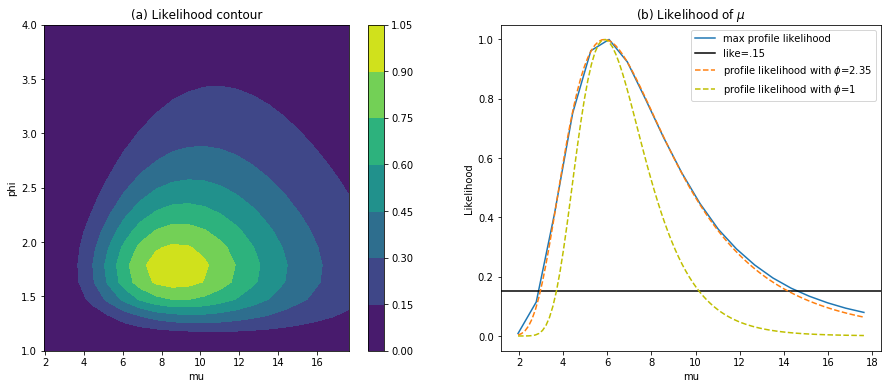

In [21]:
## EX 4-9 

x=[23.9,27.3,  0.2,  3.6 , 6.0,  0.9,  0.9, 0.5 , 0.2 ,14.2,  6.2,  0.05 , 3.9,  0.2,  0.1];x=np.array(x)
n=len(x)

def fun0(mu,phi,n):
    alpha=1/phi
    lam=1/(phi*mu)
    a=-n*math.lgamma(alpha)+n*alpha*np.log(lam)+(alpha-1)*np.sum(np.log(x))-lam*np.sum(x)
    return -a

n_p=20
mu=np.linspace(np.mean(x)/3,np.mean(x)*3,n_p)
phi=np.linspace(1,4,n_p)
alp=1/phi
lam=1/(phi*mu)

ll2=np.zeros((len(mu),len(phi)))
for i in range(len(mu)): # outer
  for j in range(len(phi)):
    ll2[i,j]=fun0(mu[i],phi[j],n)

like2=np.exp(np.min(ll2)-ll2)

# plots
fig, ((ax1, ax2)) = plt.subplots(nrows=1,ncols=2,figsize=(15,6))

cp = ax1.contourf(mu,phi,like2)
fig.colorbar(cp, ax=ax1) # Add a colorbar to a plot
ax1.set_title('(a) Likelihood contour')
ax1.set_xlabel('mu')
ax1.set_ylabel('phi')


# profile likelihood
like=np.apply_along_axis(np.max,1,like2)


ax2.plot(mu,like,linestyle='-')
ax2.set(xlabel="mu", ylabel="Likelihood",title="(b) Likelihood of $\mu$")
ax2.axhline(y=.15, color='black')

n_p=100
mu=np.linspace(np.mean(x)/3,np.mean(x)*3,n_p)
ll=fun0(phi=2.35,mu=mu,n=n)
like=np.exp(np.min(ll)-ll)

ax2.plot(mu,like,linestyle='--')

mu=np.linspace(np.mean(x)/3,np.mean(x)*3,n_p)
ll=fun0(phi=1,mu=mu,n=n)
like=np.exp(np.min(ll)-ll)

ax2.plot(mu,like,linestyle='--',color='y')
ax2.legend(['max profile likelihood','like=.15','profile likelihood with $\phi$=2.35','profile likelihood with $\phi$=1'])



mean= 2.55 ,  var= 9 ,  ratio= 3.5294117647058827 

P-value= 0.0 



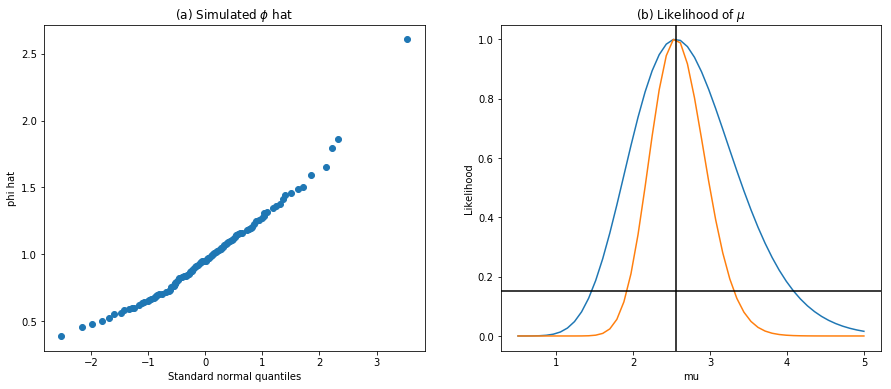

In [22]:
## EX 4-14


y=[0, 10,  1,  1,  1 , 2,  1,  4, 11 ,0,  5 , 2,  5 , 2,  0 , 2,  0 , 1,  3 , 0];y=np.array(y)
n=len(y)

phi0=statistics.variance(y)/np.mean(y)
print('mean=',np.mean(y),',  var=',statistics.variance(y),',  ratio=',phi0,'\n')

# Monte Carlo test:
a=np.random.poisson(np.mean(y),500*n)   # simulated Poisson
a=a.reshape((500,n))
amean=(a @ np.ones((n,1)))/n
avar=((a-amean)**2) @ np.ones((n,1))/(n-1)
phi=avar/amean
print('P-value=',np.sum(phi>phi0)/500,'\n')

# plots
fig, ((ax1, ax2)) = plt.subplots(nrows=1,ncols=2,figsize=(15,6))

rand_normal = np.random.normal(0,1,500)
percs = np.linspace(0,100,100)
qn_phi = np.percentile(phi, percs)#;print(qn_phi)
qn_norm = np.percentile(rand_normal, percs)
#x = np.linspace(np.min((qn_norm.min(),qn_phi.min())), np.max((qn_norm.max(),qn_phi.max())))

ax1.plot(qn_norm,qn_phi, ls="", marker="o")
#ax1.plot(x,x, color="k", ls="--")
ax1.set(xlabel="Standard normal quantiles", ylabel="phi hat",title="(a) Simulated $\phi$ hat")

mu=np.linspace(.5,5,50)
ll0=(np.log(mu)*np.sum(y) - n*mu)
l0=np.exp(ll0-np.max(ll0))
ll=(np.log(mu)*np.sum(y)-n*mu)/phi0
l=np.exp(ll-np.max(ll))

ax2.plot(mu,l)
ax2.plot(mu,l0)
ax2.set(xlabel="mu", ylabel="Likelihood",title=r"(b) Likelihood of $\mu$")
ax2.axvline(x=np.mean(y), color='black')
ax2.axhline(y=.15, color='black')


lambda-hat= 0.11630769230769232 



[Text(0,0.5,'Quantiles of log(y)'),
 Text(0.5,0,'Quantiles of standard normal'),
 Text(0.5,1,'(c) Log transform')]

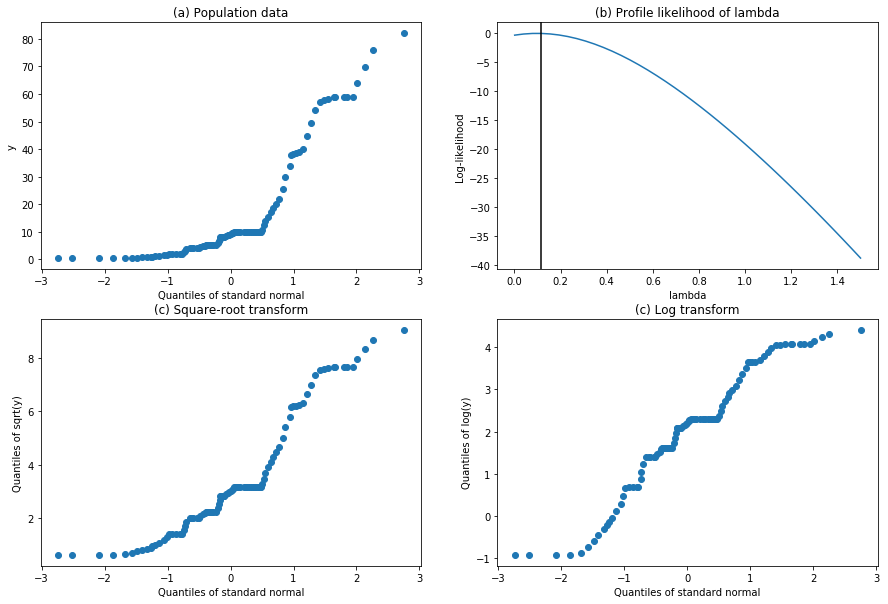

In [23]:
## EX 4-16

# population of EU countries (in millions)
y=[8,10,5,5,59,82,10,57,4,0.4,16,10,39,9,59,8,.7,10,1,10,4,2,0.4,38,22,5,2];y=np.array(y)
# y=y+1    # much better normal transform

# Exercise 4.39: brain weight   # lhat=0.08
#y=[0.4,1.0 ,1.9 ,3.0 ,5.5 , 8.1,12.1, 25.6 ,50.0,56.0,
#  70.0, 115.0 , 115.0 , 119.5, 154.5,  157.0 , 175.0,  179.0,
#  180.0, 406.0, 419.0,  423.0,  440.0 , 655.0,  680.0, 1320.0 ,
#  4603.0, 5712.0];y=np.array(y)

n=len(y)

rand_normal = np.random.normal(0,1,500)
percs = np.linspace(0,100,100)
qn_y = np.percentile(y, percs)#;print(qn_phi)
qn_norm = np.percentile(rand_normal, percs)


# plots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2,ncols=2,figsize=(15,10))

ax1.plot(qn_norm,qn_y, ls="", marker="o")
ax1.set(xlabel="Quantiles of standard normal", ylabel="y",title="(a) Population data")

nl=40
ll=np.zeros(nl)
lam=np.linspace(.001,1.5,nl)

for i in range(nl):
     yl=(y**lam[i]-1)/lam[i]
     sl2=statistics.variance(yl)*(n-1)/n
     lli=-n/2*np.log(sl2) + (lam[i]-1)*np.sum(np.log(y))
     ll[i]=lli

ll=ll-np.max(ll)

ax2.plot(lam,ll)
ax2.set(xlabel="lambda", ylabel="Log-likelihood",title="(b) Profile likelihood of lambda")

lmax=np.max(lam[ll==np.max(ll)])
ax2.axvline(x=lmax, color='black')

print('lambda-hat=', lmax,'\n')  # MLE of lambda

qn_sqrt_y = np.percentile(np.sqrt(y), percs)

ax3.plot(qn_norm,qn_sqrt_y, ls="", marker="o")
ax3.set(xlabel="Quantiles of standard normal", ylabel="Quantiles of sqrt(y)",title="(c) Square-root transform")

qn_log_y = np.percentile(np.log(y), percs)

ax4.plot(qn_norm,qn_log_y, ls="", marker="o")
ax4.set(xlabel="Quantiles of standard normal", ylabel="Quantiles of log(y)",title="(c) Log transform")


normal AIC= 189.73391301395233 

Cauchy muhat = 3.6887710526234265 

Cauchy AIC =  169.32305393951555 

normal AIC= 439.58146538811184 

Cauchy AIC= 456.2968782937869 



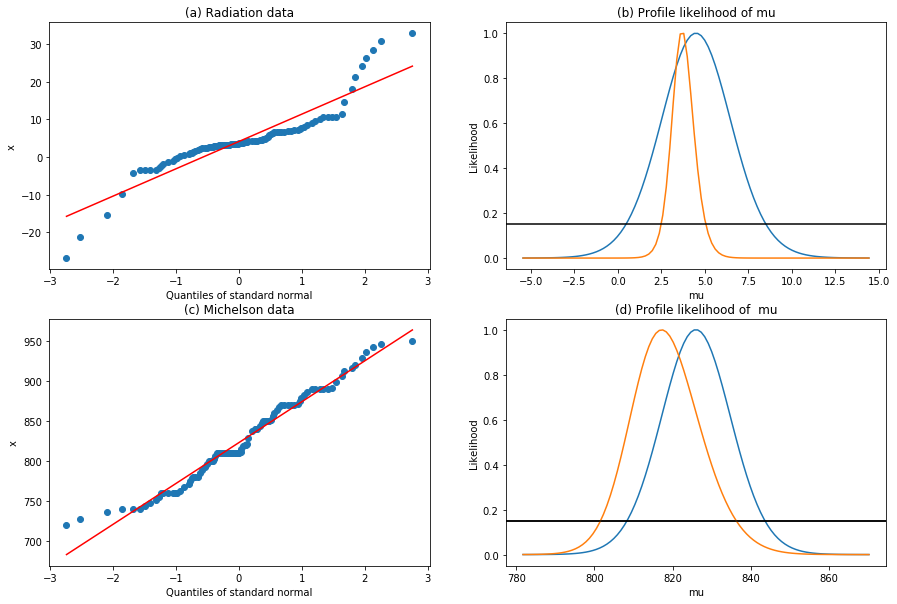

In [24]:
## EX 4-17

# heavy-tailed data example:

x=[-26.8,-3.5, -3.4, -1.2,  0.4, 1.3, 2.3, 2.7,3.0 , 3.2,  3.2,  3.5,  3.6, 3.9, 4.2, 4.4,5.0 , 6.5,  6.7,  7.1,  8.1, 10.5,10.7, 24.0, 32.8]
x=np.array(x)
n=len(x)

s2=statistics.variance(x)*(n-1)/n
llmax=np.sum(np.log(norm.pdf(x,np.mean(x),np.sqrt(s2))))  # maximized likelihood
print('normal AIC=',(-2*llmax + 2*2),'\n')

qn_x = np.percentile(x, percs)#;print(qn_phi)

# plots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2,ncols=2,figsize=(15,10))

ax1.plot(qn_norm,qn_x, ls="", marker="o")
ax1.set(xlabel="Quantiles of standard normal", ylabel="x",title="(a) Radiation data")

from statsmodels.graphics.gofplots import qqline
qqline(ax1, "r",qn_norm,qn_x)

n_p=100
xbar=np.mean(x)
mu=np.linspace(xbar+ 5*np.std(x)/np.sqrt(n),xbar-5*np.std(x)/np.sqrt(n) ,n_p)

def fun1(x,mu):
    return np.abs(x-mu)**2

xmu=np.zeros((len(x),len(mu)))
for i in range(len(x)): # outer
  for j in range(len(mu)):
    xmu[i,j]=fun1(x[i],mu[j])

nsig=xmu.transpose() @ np.ones((1,n)).transpose()
nsig=nsig.flatten()

p=2
loglik=-n/p*np.log(nsig/n)-n/2
m1=np.max(loglik)
lik1=np.exp(loglik-np.max(loglik))

ax2.plot(mu,lik1)
ax2.set(xlabel="mu", ylabel="Likelihood",title="")

# cauchy likelihood:
def fun3(p): # -loglike from cauchy
  mu=p[0];sigma=p[1]
  return -np.sum(np.log(cauchy.pdf(x,mu,sigma)))

a=minimize(fun3,[0.3,1])
print('Cauchy muhat =',a.x[0],'\n')
print('Cauchy AIC = ',(2*a.fun + 4),'\n') 

# profile from cauchy model
# fun2 takes global x and mui
def fun2(sigma): # -loglike from cauchy
  return -np.sum(np.log(cauchy.pdf(x,mui,sigma)))

ll=np.zeros(n_p)
for i in range(n_p):
  mui=mu[i]
  lli=minimize(fun2,[1])
  ll[i]=lli.fun

#m2=-np.min(ll)
#print('Cauchy AIC=',(-2*m2 + 2*2),'\n')  # should be the same as above

ll=np.exp(np.min(ll)-ll)

ax2.plot(mu,ll)
ax2.set(title="(b) Profile likelihood of mu")
ax2.axhline(y=.15, color='black')

### ..................               more normal data
# speed of light data from Example 4.8
x=[890, 810, 810, 820, 800, 770, 760, 740, 750, 760,
      910, 920, 890, 860, 880, 720, 840, 850, 850, 780,
      890, 840, 780, 810, 760, 810, 790, 810, 820, 850,
      870, 870, 810 ,740, 810, 940, 950, 800, 810, 870];x=np.array(x)

# speed of light Michelson 1882, from Stigler 1977
#x=[883,816,778,796,682,711,611,599,1051,781,578,
#      796,774,820,772,696,573,748,748,797,851,809,723];x=np.array(x)

n=len(x)
s2=statistics.variance(x)*(n-1)/n
llmax=np.sum(np.log(norm.pdf(x,np.mean(x),np.sqrt(s2))))  # maximized likelihood
print('normal AIC=',(-2*llmax+2*2),'\n')

qn_x = np.percentile(x, percs)#;print(qn_phi)
ax3.plot(qn_norm,qn_x, ls="", marker="o")
ax3.set(xlabel="Quantiles of standard normal", ylabel="x",title="(c) Michelson data")
qqline(ax3, "r",qn_norm,qn_x)


n_p=100
xbar=np.mean(x)
mu=np.linspace(xbar+ 5*np.std(x)/np.sqrt(n),xbar- 5*np.std(x)/np.sqrt(n) ,n_p)

def fun1(x,mu):
    return np.abs(x-mu)**2

xmu=np.zeros((len(x),len(mu)))
for i in range(len(x)): # outer
  for j in range(len(mu)):
    xmu[i,j]=fun1(x[i],mu[j])

nsig=xmu.transpose() @ np.ones((1,n)).transpose()
nsig=nsig.flatten()
p=2
loglik=-n/p*np.log(nsig/n) - n/2
m1=np.max(loglik)
lik1=np.exp(loglik-np.max(loglik))

ax4.plot(mu,lik1)
ax4.set(xlabel='mu',ylabel='Likelihood',title="(d) Profile likelihood of  mu")
ax4.axhline(y=.15, color='black')

# profile from cauchy model
# fun2 takes global x and mui
def fun2(sigma): # -loglike from cauchy
  return -np.sum(np.log(cauchy.pdf(x,mui,sigma)))

ll=np.zeros(n_p)
for i in range(n_p):
  mui=mu[i]
  lli=minimize(fun2,[1])
  ll[i]=lli.fun

print('Cauchy AIC=',(2*np.min(ll) + 2*2),'\n')

ll=np.exp(np.min(ll)-ll)

ax4.plot(mu,ll)
ax4.set(title="(d) Profile likelihood of  mu")
ax4.axhline(y=.15, color='black')


Text(0.5,1,'Bootstrap distribution of exp(-xbar)')

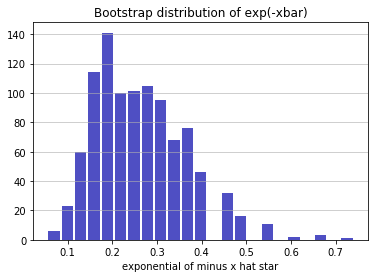

In [25]:
## EX 5-3

n=10
nrep=1000
xbar=1.4   # the only value needed from the data

x=np.random.poisson(xbar,nrep*n)
x=x.reshape((nrep,n))
xmean=x @ np.ones((1,n)).transpose()/n
xmean=xmean.flatten()

n, bins, patches = plt.hist(x=np.exp(-xmean), bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('exponential of minus x hat star')
plt.ylabel('')
plt.title('Bootstrap distribution of exp(-xbar)')


[Text(0,0.5,''),
 Text(0.5,0,'hat rho star'),
 Text(0.5,1,'(b) Bootstrap distribution')]

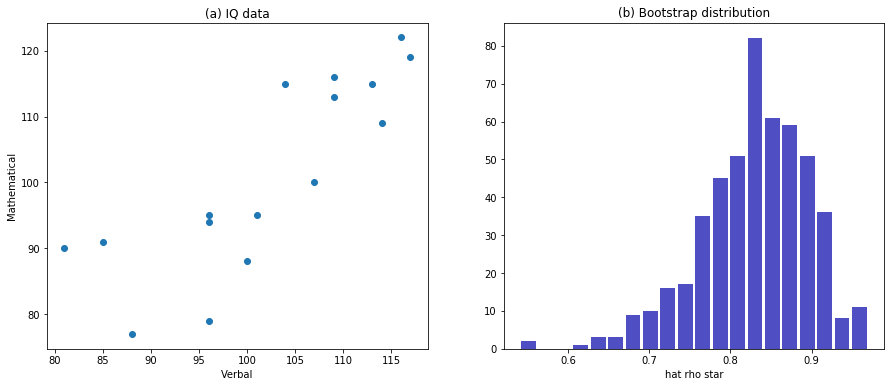

In [26]:
## EX 5-5


x=[109,  88,  96,  96, 109, 116, 114,  96, 85, 100, 113, 117, 107, 104, 101,  81];x=np.array(x)
y=[116, 77,  95,  79, 113, 122, 109,  94, 91,  88, 115, 119, 100, 115,  95,  90];y=np.array(y)
n=len(x)
Random_seed=[0,1900,90,1]

# plots
fig, ((ax1, ax2)) = plt.subplots(nrows=1,ncols=2,figsize=(15,6))

ax1.plot(x,y, ls="", marker="o")
ax1.set(xlabel="Verbal", ylabel="Mathematical",title="(a) IQ data")

nb=500
M1=np.zeros(nb)

for i in range(nb):
  id=np.random.choice(np.arange(1,n),n)
  x1=x[id]; y1=y[id]
  temp=np.corrcoef(x1,y1)
  M1[i]=temp[0,1]

n, bins, patches = ax2.hist(x=M1, bins=20, color='#0504aa',alpha=0.7, rwidth=0.85)
ax2.set(xlabel="hat rho star", ylabel="",title="(b) Bootstrap distribution")


[0.6154545454545455, 7.275454545454545]


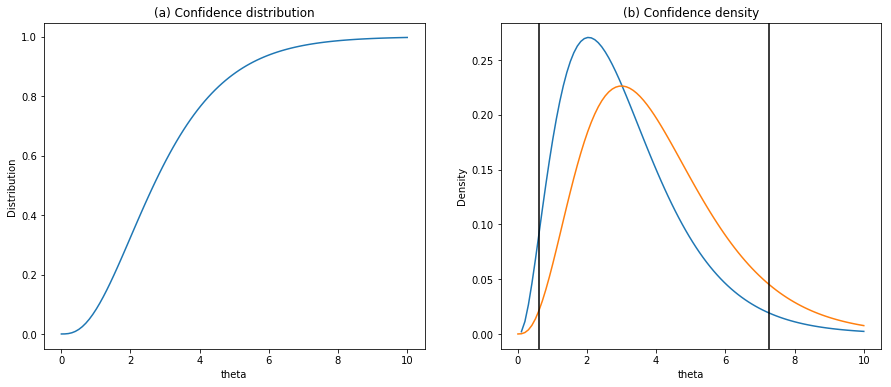

In [27]:
## EX 5-10

x=3

th=np.linspace(0.01,10,100)
ll=-th + x*np.log(th)
like=np.exp(ll-np.max(ll))
like=like/np.sum(like)/(th[1]-th[0])

right=1-poisson.cdf(x-1,th)
c1=np.diff(right)/np.diff(th)

# plots
fig, ((ax1, ax2)) = plt.subplots(nrows=1,ncols=2,figsize=(15,6))

ax1.plot(th,right)
ax1.set(xlabel="theta", ylabel="Distribution",title="(a) Confidence distribution")

low=np.max(th[right<0.025])
up=np.min(th[right>0.975])
print([low,up])

ax2.plot(th[1:],c1)
ax2.plot(th,like)
ax2.set(xlabel="theta", ylabel="Density",title="(b) Confidence density")
ax2.axvline(x=up, color='black')
ax2.axvline(x=low, color='black')


In [28]:
## EX 5-11

x=[109,  88,  96,  96, 109, 116, 114,  96, 85, 100, 113, 117, 107, 104, 101,  81];x=np.array(x)
y=[116, 77,  95,  79, 113, 122, 109,  94, 91,  88, 115, 119, 100, 115,  95,  90];y=np.array(y)
n=len(x)

nb=500
M1=np.zeros(nb)
for i in range(nb):
  id=np.random.choice(np.arange(1,n),n)
  x1=x[id]; y1=y[id]
  temp=np.corrcoef(x1,y1)
  M1[i]=temp[0,1]

a=[0.025,0.975]
M1_sorted=np.sort(M1)

print('Bootstrap 95% CI=',M1_sorted[int(a[0]*nb)],M1_sorted[int(a[1]*nb)],'\n')
print('For H0: rho=0.5, one sided P-value=',np.sum(M1<0.5)/nb,'\n')


Bootstrap 95% CI= 0.694843358723354 0.9394740247477872 

For H0: rho=0.5, one sided P-value= 0.004 



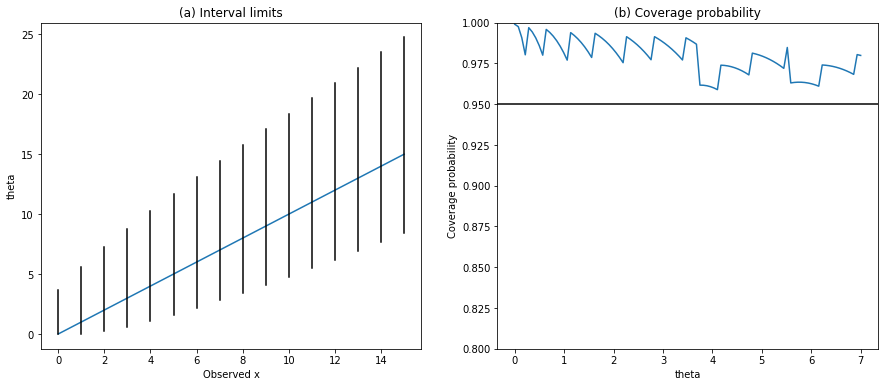

In [29]:
## Ex 4-12

# confidence intervals for Poisson models:

xx=arange(0,16,1)
tmax=np.max(xx)+ 2*np.sqrt(np.max(xx))+2
th=np.linspace(.0001,tmax,int(tmax*1000))

ci=np.zeros((len(xx),2))
for x in xx:
  pright=1-poisson.cdf((x-1),th) - 0.0*poisson.pmf(x,th)
  lo=np.min(th[pright>.025])
  pleft=poisson.cdf(x,th) - 0.0*poisson.pmf(x,th)
  up=np.max(th[pleft>.025])
  ai=[lo,up]
  ci[x,:]=ai

#print(np.round(ci,2))

# plots
fig, ((ax1, ax2)) = plt.subplots(nrows=1,ncols=2,figsize=(15,6))
#ax1.plot(xx,ci[:,0])
ax1.plot(xx,xx)
for x in xx: 
  ax1.plot([x,x],ci[x,],color='black')
ax1.set(xlabel="Observed x", ylabel="theta",title="(a) Interval limits")


tt=np.linspace(0.001,7,100)
confci=np.zeros(len(tt))
for i,theta in enumerate(tt):
  inside=np.where((theta<=ci[:,1]) & (theta>=ci[:,0]),1,0)
  ai=np.sum(poisson.pmf(xx[inside==1],theta))
  confci[i]=ai

ax2.plot(tt,confci)
ax2.set(xlabel="theta", ylabel="Coverage probability",title="(b) Coverage probability", ylim=[0.8,1])
ax2.axhline(y=.95, color='black')


c:\Users\Nicolo-pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


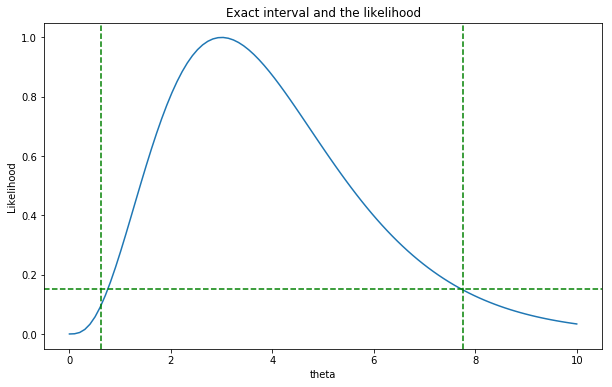

In [30]:
## EX 5-13

x=3
th=np.linspace(0,10,100)
ll=-th+x*np.log(th)
like=np.exp(ll-np.max(ll))

_, ax1 = plt.subplots(nrows=1,ncols=1,figsize=(10,6))
ax1.plot(th,like)
ax1.set(xlabel="theta", ylabel="Likelihood",title="Exact interval and the likelihood")
ax1.axvline(x=[.62], color='g', linestyle='--')
ax1.axvline(x=[7.76], color='g', linestyle='--')
ax1.axhline(y=[.15], color='g', linestyle='--')


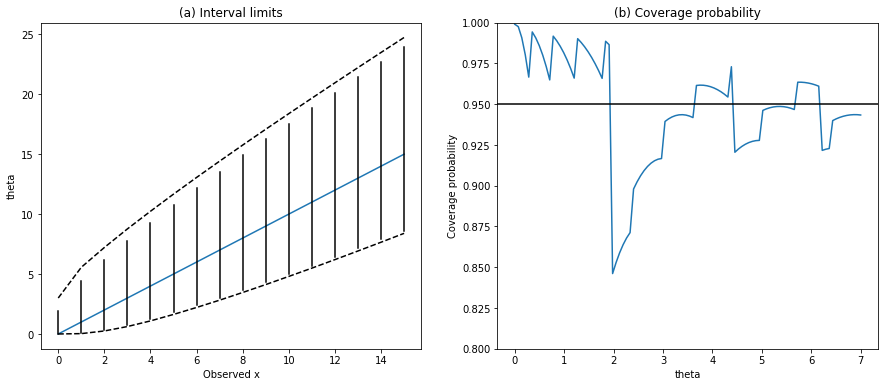

In [31]:
## EX 5-14

xx=np.arange(0,16,1)
tmax=np.max(xx)+ 2*np.sqrt(np.max(xx))+2
th=np.linspace(.0001,tmax,int(tmax*100))

result=np.zeros((len(xx),2))
for i,x in enumerate(xx):
    like=poisson.pmf(x,th)
    like=like/np.max(like)
    a=li(th,like,np.exp((-1.96**2)/2))
    result[i,:]=a

ci=result

# plots
fig, ((ax1, ax2)) = plt.subplots(nrows=1,ncols=2,figsize=(15,6))
ax1.plot(xx,xx)
for x in xx: 
  ax1.plot([x,x],ci[x,],color='black')
ax1.set(xlabel="Observed x", ylabel="theta",title="(a) Interval limits")

ci=np.zeros((len(xx),2))
ci[0,:]=[0,3]  # confidence intervals
for i,x in enumerate(xx[1:]):
  i=i+1
  pright=1-poisson.cdf((x-1),th) - 0.0*poisson.pmf(x,th)
  lo=np.min(th[pright>.025])
  pleft=poisson.cdf(x,th) - 0.0*poisson.pmf(x,th)
  up=np.max(th[pleft>.025])
  ai=[lo,up]
  ci[i,:]=ai

ax1.plot(xx,ci[:,0],color='black',linestyle='--')
ax1.plot(xx,ci[:,1],color='black',linestyle='--')

tt=np.linspace(0.001,7,100)
conf=np.zeros(len(tt))
for i,theta in enumerate(tt):
  inside=np.where((theta<=result[:,1]) & (theta>=result[:,0]),1,0)
  ai=np.sum(poisson.pmf(xx[inside==1],theta))
  conf[i]=ai

ax2.plot(tt,conf)
ax2.set(xlabel="theta", ylabel="Coverage probability",title="(b) Coverage probability", ylim=[0.8,1])
ax2.axhline(y=.95, color='black')


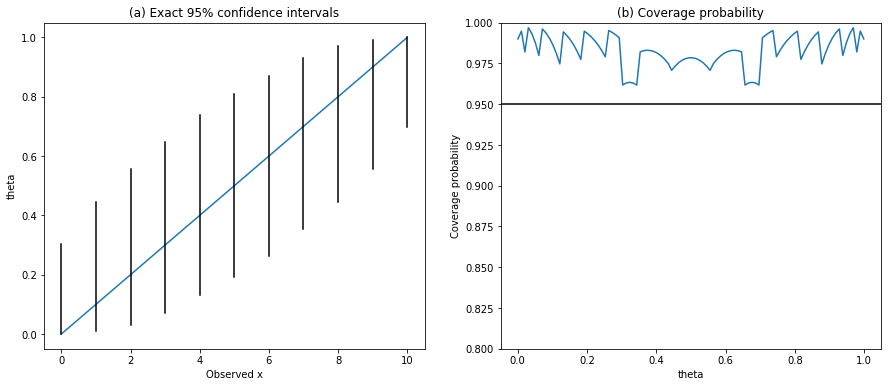

In [32]:
## EX 5-15
#  Exact intervals for Binomial

n=10
xx=np.arange(0,n+1,1)
th=np.linspace(.0001,.9999,100)
ci=np.zeros((len(xx),2))
for x in xx:
  pright=1-binom.cdf((x-1),n,th) - 0.0*binom.pmf(x,n,th)
  lo=np.min(th[pright>.025])
  pleft=binom.cdf(x,n,th) - 0.0*binom.pmf(x,n,th)
  up=np.max(th[pleft>.025])
  ai=[lo,up]
  ci[x,:]=ai

# plots
fig, ((ax1, ax2)) = plt.subplots(nrows=1,ncols=2,figsize=(15,6))
ax1.plot(xx,xx/n)
for x in xx: 
  ax1.plot([x,x],ci[x,],color='black')
ax1.set(xlabel="Observed x", ylabel="theta",title="(a) Exact 95% confidence intervals")

tt=np.linspace(0.001,.999,100)
conf=np.zeros(len(tt))
for i,theta in enumerate(tt):
  inside=np.where((theta<=ci[:,1]) & (theta>=ci[:,0]),1,0)
  ai=np.sum(binom.pmf(xx[inside==1],n,theta))
  conf[i]=ai

ax2.plot(tt,conf)
ax2.set(xlabel="theta", ylabel="Coverage probability",title="(b) Coverage probability", ylim=[0.8,1])
ax2.axhline(y=.95, color='black')


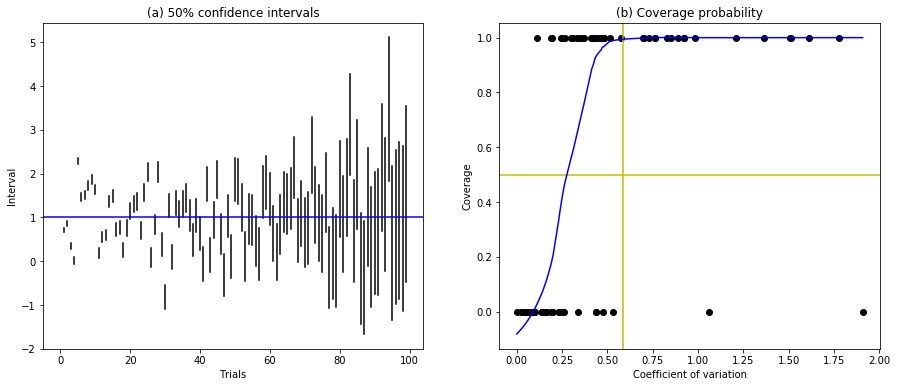

In [33]:
## EX 5-17

n=100
mu=1
np.random.seed(2)
x=np.random.normal(0,1,n*2)
x=x.reshape((n,2))+mu
xmin=np.apply_along_axis(np.min,1,x)
xmax=np.apply_along_axis(np.max,1,x)
width=xmax-xmin

ord=np.argsort(width)
xmin=xmin[ord]
xmax=xmax[ord]

# plots
fig, ((ax1, ax2)) = plt.subplots(nrows=1,ncols=2,figsize=(15,6))

for i,x in enumerate(range(n)): 
  ax1.plot([i,i],[xmin[x],xmax[x]],color='black')
ax1.set(xlabel="Trials", ylabel="Interval",title="(a) 50% confidence intervals")
ax1.axhline(y=mu, color='blue')

width=xmax-xmin
cv=width/np.sqrt(2)/np.abs(xmin+xmax)

cover=(xmin<mu)&(mu<xmax)

ax2.plot(cv[cv<2],cover[cv<2],color='black',marker='o',ls='')
ax2.set(xlabel="Coefficient of variation", ylabel="Coverage",title="(b) Coverage probability")
ax2.axhline(y=0.5, color='y')
ax2.axvline(x=np.sqrt(2)/(1+np.sqrt(2)), color='y')

lowess=sm.nonparametric.lowess
lowe=lowess(exog=cv[cv<2],endog=np.multiply(cover[cv<2],1),frac=2/3)
ax2.plot(lowe[:,0],lowe[:,1],color='blue')


[8580.714285714284, 0.03342105263157895]


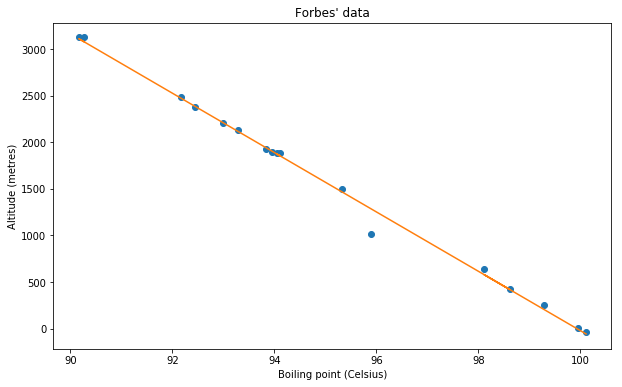

In [34]:
## EX 6-1

x0=[194.5, 194.3, 197.9, 198.4, 199.4, 199.9, 200.9, 201.1 ,201.4, 201.3, 203.6 ,204.6, 209.5 ,208.6, 210.7, 211.9, 212.2]
x0=np.array(x0)
x1=[20.79, 20.79, 22.40, 22.67, 23.15, 23.35, 23.89, 23.99, 24.02, 24.01, 25.14, 26.57, 28.49, 27.76, 29.04, 29.88, 30.06]
x1=np.array(x1)

temp=(x0-32)*5/9
alt=-(287*293/9.8)*np.log(x1*25.4/760)
print([287*293/9.8,25.4/760])

# plots
fig, ((ax1)) = plt.subplots(nrows=1,ncols=1,figsize=(10,6))

ax1.plot(temp,alt,marker='o',ls='')
ax1.set(xlabel="Boiling point (Celsius)", ylabel="Altitude (metres)",title="Forbes' data")
coef = np.polyfit(temp,alt,1)
poly1d_fn = np.poly1d(coef) 
ax1.plot(temp,poly1d_fn(temp))


Coefficients: 
 157.33333333333334 9.23226418702087


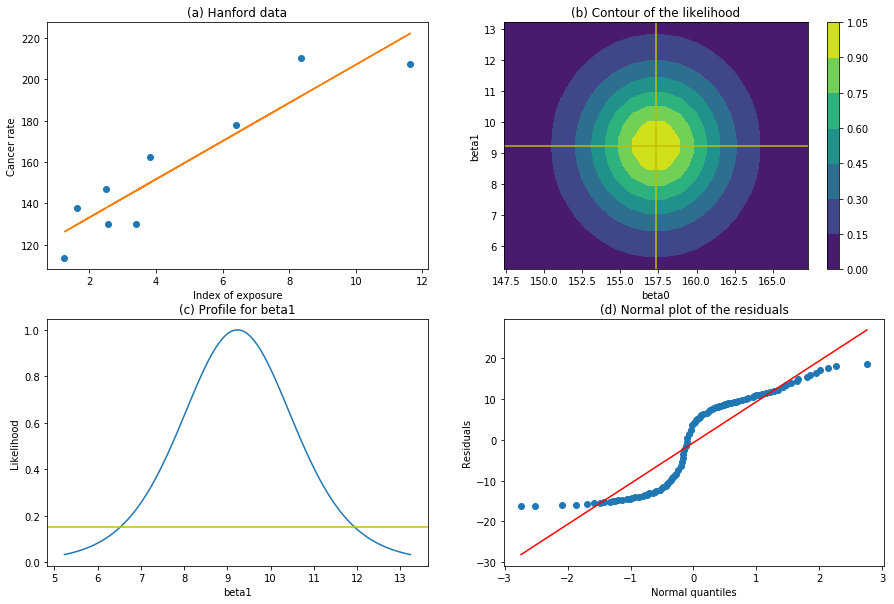

In [35]:
## EX 6-2

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

x=[8.34,  6.41,  3.41,  3.83,  2.57, 11.64,  1.25,  2.49,  1.62];x=np.array(x)
y=[210.3, 177.9, 129.9, 162.2, 130.1, 207.5, 113.5, 147.1, 137.5];y=np.array(y)

# plots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2,ncols=2,figsize=(15,10))

ax1.plot(x,y,marker='o',ls='')
ax1.set(xlabel="Index of exposure", ylabel="Cancer rate",title="(a) Hanford data")

x0=x-np.mean(x)
x0=x0.reshape(-1,1)
y=y.reshape(-1,1)
regr = linear_model.LinearRegression()
regr.fit(x0, y)
print("Coefficients: \n", regr.intercept_[0], regr.coef_[0][0])
muhat = regr.predict(x0)
ax1.plot(x,muhat)

n=len(x)
def fun1(bo,b1):
    return -n/2*np.log(np.sum((y-bo-b1*x0)**2))

b0hat=regr.intercept_[0]
b1hat=regr.coef_[0][0]
bb0=np.linspace(b0hat-10,b0hat+10,20)
bb1=np.linspace(b1hat-4,b1hat+4,20)

ll=np.zeros((len(bb0),len(bb1)))
for i,b0 in enumerate(bb0):
  for j,b1 in enumerate(bb1):
    ll[i,j]=fun1(b0,b1)

lik=np.exp(ll-np.max(ll))

cp = ax2.contourf(bb0,bb1,lik)
fig.colorbar(cp, ax=ax2) # Add a colorbar to a plot
ax2.set_title('(b) Contour of the likelihood')
ax2.set_xlabel('beta0')
ax2.set_ylabel('beta1')
ax2.axvline(x=b0hat, color='y')
ax2.axhline(y=b1hat, color='y')

bb1=np.linspace(b1hat-4,b1hat+4,100)
def fun2(b1):
  bo=np.mean(y)
  return -n/2*np.log(np.sum((y-bo-b1*x0)**2))

ll=np.zeros(len(bb1))
for i,b1 in enumerate(bb1):
  ll[i]=fun2(b1)

like=np.exp(ll-np.max(ll))

ax3.plot(bb1,like)
ax3.set(xlabel="beta1", ylabel="Likelihood",title="(c) Profile for beta1")
ax3.axhline(y=.15, color='y')

qn_muhat = np.percentile(y-muhat, percs)
ax4.plot(qn_norm,qn_muhat, ls="", marker="o")
ax4.set(xlabel="Normal quantiles", ylabel="Residuals",title="(d) Normal plot of the residuals")
qqline(ax4, "r",qn_norm,qn_muhat)


Coefficeients
Intercept   -0.722636
x0           0.159855
dtype: float64
95% CI for beta1= [0.007 0.298] 



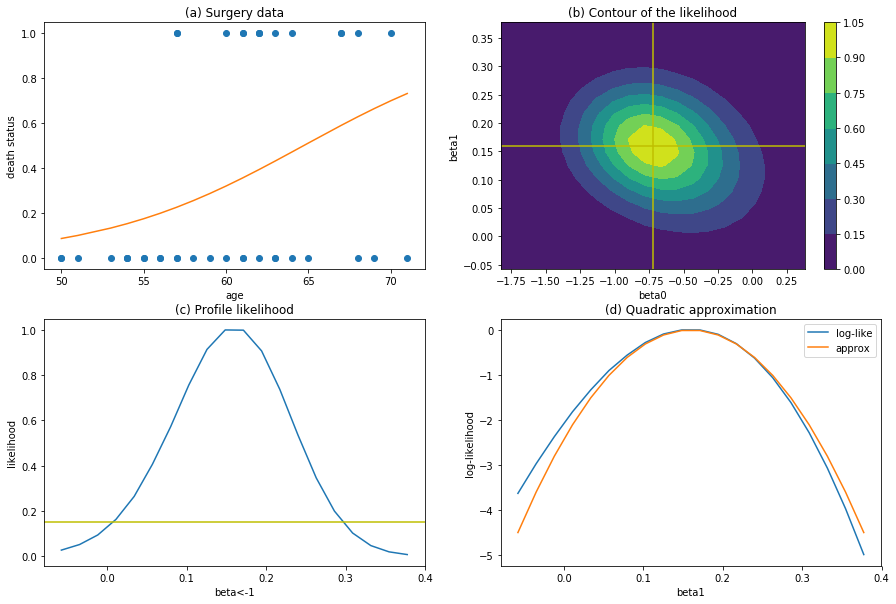

In [36]:
## EX 6-3

import statsmodels.formula.api as smf

x=[50, 50, 51, 53, 54, 54, 54, 55, 55, 56, 56, 57, 57, 57, 57, 58, 59, 60, 60, 61, 61, 61, 61, 62, 62, 62, 62, 63, 63, 63, 64, 64, 65, 67, 67, 68, 68, 69, 70, 71];x=np.array(x)
y=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0];y=np.array(y)

# plots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2,ncols=2,figsize=(15,10))

ax1.plot(x,y,marker='o',ls='')
ax1.set(xlabel="age", ylabel="death status",title="(a) Surgery data")

x0=x-np.mean(x)

formula='y ~ x0'
data={'y': y,'x0': x0}
df=pd.DataFrame(data)
regr=smf.glm(formula = formula, data=df, family=sm.families.Binomial())
result=regr.fit()
print("Coefficeients")
print(result.params)
muhat = result.predict()
ax1.plot(x,muhat)
#print(result.summary())

# 2d likelihood

b0hat=result.params[0]
se0=result.bse[0]
b1hat=result.params[1] 
se1=result.bse[1]

x0=x-np.mean(x)
def fun1(bo,b1):
    return np.sum(y*(bo+b1*x0)- np.log(1+np.exp(bo+b1*x0)))

lik=np.zeros((20,20))
bb0=np.linspace(b0hat-3*se0, b0hat+3*se0,20)
bb1=np.linspace(b1hat-3*se1, b1hat+3*se1,20)
for i,bo in enumerate(bb0):
    for j,b1 in enumerate(bb1):
        lik[i,j]=fun1(bo,b1)

maxlik=np.max(lik)
lik=lik-maxlik
lik=np.exp(lik)

cp = ax2.contourf(bb0,bb1,lik)
fig.colorbar(cp, ax=ax2) # Add a colorbar to a plot
ax2.set_title('(b) Contour of the likelihood')
ax2.set_xlabel('beta0')
ax2.set_ylabel('beta1')
ax2.axvline(x=b0hat, color='y')
ax2.axhline(y=b1hat, color='y')

lik1=np.apply_along_axis(np.max,1,lik)

ax3.plot(bb1,lik1)
ax3.set(xlabel="beta<-1", ylabel="likelihood",title="(c) Profile likelihood")
ax3.axhline(y=.15, color='y')

print('95% CI for beta1=',np.round(li(bb1,lik1,.15),3),'\n')

# normal approx
se=se1
ll=np.log(lik1)
ll2=-1/2/se**2*(bb1-b1hat)**2

ax4.plot(bb1,ll)
ax4.plot(bb1,ll2)
ax4.set(xlabel="beta1", ylabel="log-likelihood",title="(d) Quadratic approximation")
ax4.legend(['log-like','approx'])


In [37]:
## EX 6-4

y=[10, 23, 23, 26, 17,  5, 53, 55, 32, 46, 10,  8, 10,  8, 23,  0,  3, 22, 15, 32,  3];y=np.array(y)
n=[39, 62, 81, 51, 39,  6, 74, 72, 51, 79, 13, 16, 30, 28, 45,  4, 12, 41, 30, 51,  7];n=np.array(n)

seed=np.zeros(21)
seed[11:21]=np.ones(10)
extract=np.zeros(21)
extract[5:11]=np.ones(6)
extract[16:21]=np.ones(5)

data = {'y': y,'n': n, 'ny':n-y,
'seed': seed, 'extract': extract}
df = pd.DataFrame(data)
formula='y+ny ~ seed * extract'
model = smf.glm(formula=formula, data=df, family=sm.families.Binomial())
result = model.fit()

print(result.summary())

# how X matrix is setup
N=len(y)
X=np.zeros((N,4))
X[:,0]=1
X[:,1]=seed
X[:,2]=extract
X[:,3]=seed*extract


                 Generalized Linear Model Regression Results                  
Dep. Variable:            ['y', 'ny']   No. Observations:                   21
Model:                            GLM   Df Residuals:                       17
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -54.937
Date:                Wed, 05 Apr 2023   Deviance:                       33.278
Time:                        22:50:49   Pearson chi2:                     1.66
No. Iterations:                     4                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.5582      0.126     -4.429      0.000      -0.805      -0.311
seed             0.1459      0.223      0.654 

Coefficeients
Intercept    0.425497
x0           0.066260
dtype: float64
95% CI for beta1= [0.012 0.116] 



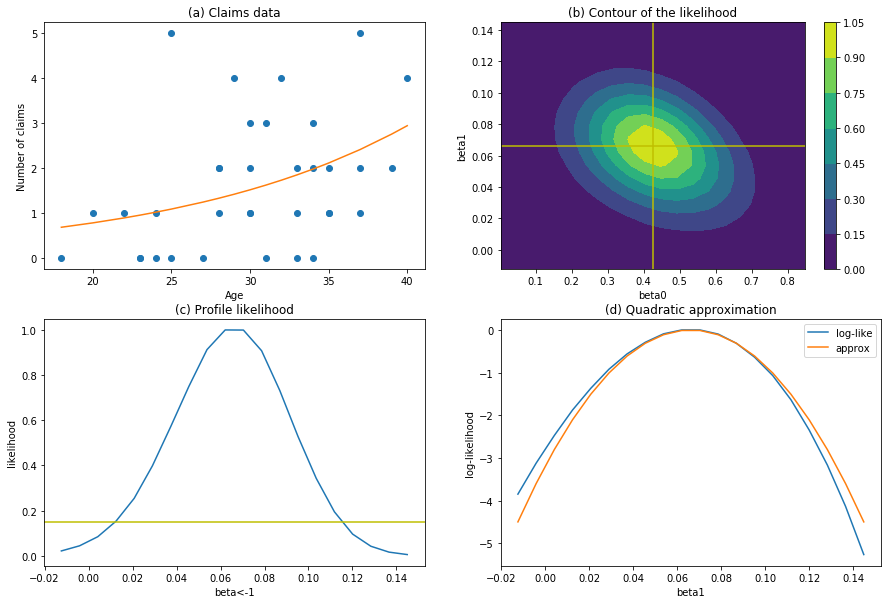

In [38]:
## EX 6-5

x=[18, 20, 22, 23, 23, 24, 24, 25, 25, 27, 28, 28, 28, 29, 30, 30, 30, 30, 31, 31, 32, 33, 33, 33, 34, 34, 34, 35, 35, 35, 37, 37, 37, 39, 40];x=np.array(x)
y=[0, 1, 1, 0, 0, 0, 1, 0, 5, 0, 1, 2, 2, 4, 2, 1, 3, 1, 0, 3, 4, 2, 0, 1, 2, 3, 0, 1, 2, 1, 2, 5, 1, 2, 4];y=np.array(y)

# plots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2,ncols=2,figsize=(15,10))

ax1.plot(x,y,marker='o',ls='')
ax1.set(xlabel="Age", ylabel="Number of claims",title="(a) Claims data")

x0=x-np.mean(x)

formula='y ~ x0'
data={'y': y,'x0': x0}
df=pd.DataFrame(data)
regr=smf.glm(formula = formula, data=df, family=sm.families.Poisson())
result=regr.fit()
print("Coefficeients")
print(result.params)
muhat = result.predict()
ax1.plot(x,muhat)
#print(result.summary())

# 2d likelihood

b0hat=result.params[0]
se0=result.bse[0]
b1hat=result.params[1] 
se1=result.bse[1]

x0=x-np.mean(x)
def fun1(bo,b1):
    return   np.sum(y*(bo+b1*x0)- np.exp(bo+b1*x0))

lik=np.zeros((20,20))
bb0=np.linspace(b0hat-3*se0, b0hat+3*se0,20)
bb1=np.linspace(b1hat-3*se1, b1hat+3*se1,20)
for i,bo in enumerate(bb0):
    for j,b1 in enumerate(bb1):
        lik[i,j]=fun1(bo,b1)

maxlik=np.max(lik)
lik=lik-maxlik
lik=np.exp(lik)

cp = ax2.contourf(bb0,bb1,lik)
fig.colorbar(cp, ax=ax2) # Add a colorbar to a plot
ax2.set_title('(b) Contour of the likelihood')
ax2.set_xlabel('beta0')
ax2.set_ylabel('beta1')
ax2.axvline(x=b0hat, color='y')
ax2.axhline(y=b1hat, color='y')

lik1=np.apply_along_axis(np.max,1,lik)

ax3.plot(bb1,lik1)
ax3.set(xlabel="beta<-1", ylabel="likelihood",title="(c) Profile likelihood")
ax3.axhline(y=.15, color='y')

print('95% CI for beta1=',np.round(li(bb1,lik1,.15),3),'\n')

# normal approx
se=se1
ll=np.log(lik1)
ll2=-1/2/se**2*(bb1-b1hat)**2

ax4.plot(bb1,ll)
ax4.plot(bb1,ll2)
ax4.set(xlabel="beta1", ylabel="log-likelihood",title="(d) Quadratic approximation")
ax4.legend(['log-like','approx'])


In [39]:
## EX 6-6

acc=[13,  6, 30, 20, 10, 15,  7, 13,  0,  2,  4,  0,  0,  6,  1,  2];acc=np.array(acc)
year=[9, 9, 8, 8, 9, 8, 9, 8, 2, 2, 3, 2, 2, 2, 2, 3];year=np.array(year)
site=np.tile(np.linspace(1,8,8),2)
treat=np.concatenate((np.repeat([0],8),np.repeat([1],8)))

data = {'acc': acc,'treat': treat, 'year': year}
df = pd.DataFrame(data)
formula='acc ~ treat'
model = smf.glm(formula=formula, data=df, offset=np.log(df["year"]), family=sm.families.Poisson())
result = model.fit()

print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    acc   No. Observations:                   16
Model:                            GLM   Df Residuals:                       14
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -50.055
Date:                Wed, 05 Apr 2023   Deviance:                       50.863
Time:                        22:50:50   Pearson chi2:                     53.4
No. Iterations:                     5                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5167      0.094      5.517      0.000       0.333       0.700
treat         -0.6990      0.275     -2.545      0.0

Coefficients: 
 0.03545336726545791 [0.01550613]
Coefficeients
Intercept    0.034673
x0           0.015721
dtype: float64
0.025168002284325728
beta0-hat= 0.0346733949002835 ,  se= 0.012326430209848542 

beta1-hat= 0.015720822604606256 ,  se= 0.008462207429656544 



c:\Users\Nicolo-pc\Anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:244: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  DomainWarning)


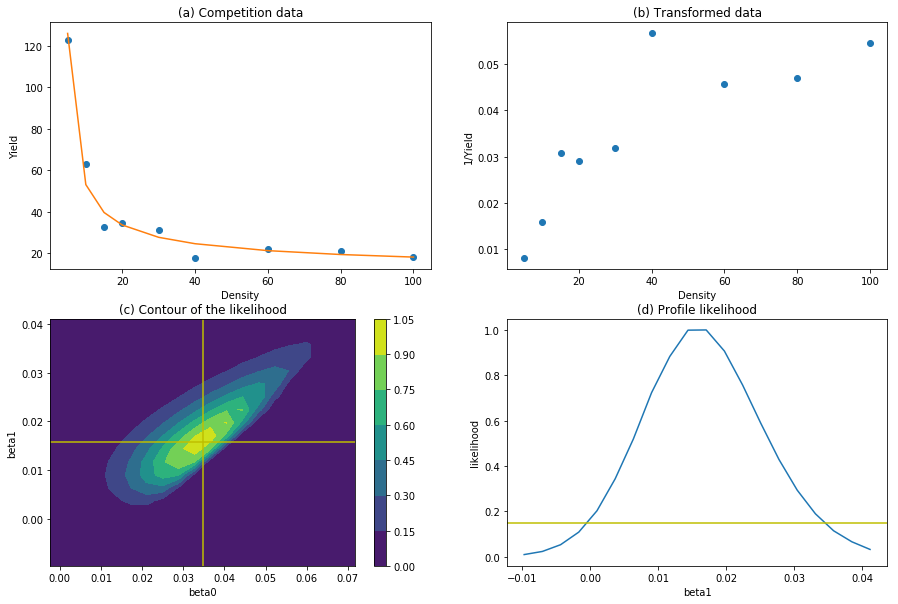

In [40]:
## EX 6-7

den=[5,  10,  15,  20,  30,  40,  60,  80, 100];x=np.array(den)
y=[122.7,  63.0,  32.5,  34.5,  31.4,  17.7,  21.9,  21.3,  18.4];y=np.array(y)
n=len(y)

# plots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2,ncols=2,figsize=(15,10))

ax1.plot(den,y,marker='o',ls='')
ax1.set(xlabel="Density", ylabel="Yield",title="(a) Competition data")

x0=np.log(den)-np.mean(np.log(den))
regr = linear_model.LinearRegression()
y_tmp=1/y
regr.fit(x0.reshape((len(y_tmp),1)), y_tmp.reshape((len(y_tmp),1)))
print("Coefficients: \n", regr.intercept_[0], regr.coef_[0])

formula='y ~ x0'
data={'y': y,'x0': x0}
df=pd.DataFrame(data)
regr=smf.glm(formula = formula, data=df, family=sm.families.Gamma())
result=regr.fit()
print("Coefficeients")
print(result.params)
muhat = result.predict()
ax1.plot(x,muhat)

ax2.plot(den,1/y,marker='o',ls='')
ax2.set(xlabel="Density", ylabel="1/Yield",title="(b) Transformed data")

phi=1/(n-2)*np.sum(((y-muhat)**2)/(muhat**2))   # ....... phi=0.025
print(phi)  

# 2d likelihood

b0hat=result.params[0]
se0=result.bse[0]/np.sqrt(0.025)
b1hat=result.params[1] 
se1=result.bse[1]/np.sqrt(0.025)

print('beta0-hat=',b0hat,',  se=',se0,'\n')
print('beta1-hat=',b1hat,',  se=',se1,'\n')

def fun1(bo,b1,y,x0):
    a=np.where(((bo+b1*x0)<0.00001),0.00001,bo+b1*x0)
    return np.sum(-y*a + np.log(a))

lik=np.zeros((20,20))
bb0=np.linspace(b0hat-3*se0, b0hat+3*se0,20)
bb1=np.linspace(b1hat-3*se1, b1hat+3*se1,20)
for i,bo in enumerate(bb0):
    for j,b1 in enumerate(bb1):
        lik[i,j]=fun1(bo,b1,y,x0)

maxlik=np.max(lik)
lik=lik-maxlik
lik=np.exp(lik)

cp = ax3.contourf(bb0,bb1,lik)
fig.colorbar(cp, ax=ax3) # Add a colorbar to a plot
ax3.set_title('(c) Contour of the likelihood')
ax3.set_xlabel('beta0')
ax3.set_ylabel('beta1')
ax3.axvline(x=b0hat, color='y')
ax3.axhline(y=b1hat, color='y')

lik1=np.apply_along_axis(np.max,0,lik)

ax4.plot(bb1,lik1)
ax4.set(xlabel="beta1", ylabel="likelihood",title="(d) Profile likelihood")
ax4.axhline(y=.15, color='y')



In [41]:
## EX 6-7 continued


In [42]:
## EX 6-11

x=[50, 50, 51, 53, 54, 54, 54, 55, 55, 56, 56, 57, 57, 57, 57, 58, 59, 60, 60, 61, 61, 61, 61, 62, 62, 62, 62, 63, 63, 63, 64, 64, 65, 67, 67 ,68, 68, 69, 70, 71];x=np.array(x)
y=[0, 0, 0, 0, 0, 0, 0, 0 ,0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0];y=np.array(y)

# glm
x0=x-np.mean(x)
formula='y ~ x0'
data={'y': y,'x0': x0}
df=pd.DataFrame(data)
regr=smf.glm(formula = formula, data=df, family=sm.families.Binomial())
result=regr.fit()
print(result.summary())

print('Null deviance=',result.null_deviance,', df=',len(y)-1,'\n')
print('Deviance of Const+Age=',result.deviance,', df=',result.df_resid,'\n')


                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                   40
Model:                            GLM   Df Residuals:                       38
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -23.000
Date:                Wed, 05 Apr 2023   Deviance:                       45.999
Time:                        22:50:51   Pearson chi2:                     37.4
No. Iterations:                     4                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7226      0.368     -1.965      0.049      -1.443      -0.002
x0             0.1599      0.073      2.202      0.0

In [43]:
## EX 6-12 == 6-6

acc=[13,  6, 30, 20, 10, 15,  7, 13,  0,  2,  4,  0,  0,  6,  1,  2];acc=np.array(acc)
year=[9, 9, 8, 8, 9, 8, 9, 8, 2, 2, 3, 2, 2, 2, 2, 3];year=np.array(year)
site=np.tile(np.linspace(1,8,8),2)
treat=np.concatenate((np.repeat([0],8),np.repeat([1],8)))

data = {'acc': acc,'treat': treat, 'year': year}
df = pd.DataFrame(data)
formula='acc ~ treat'
model = smf.glm(formula=formula, data=df, offset=np.log(df["year"]), family=sm.families.Poisson())
result = model.fit()

print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    acc   No. Observations:                   16
Model:                            GLM   Df Residuals:                       14
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -50.055
Date:                Wed, 05 Apr 2023   Deviance:                       50.863
Time:                        22:50:52   Pearson chi2:                     53.4
No. Iterations:                     5                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5167      0.094      5.517      0.000       0.333       0.700
treat         -0.6990      0.275     -2.545      0.0

                  Generalized Linear Model Regression Results                   
Dep. Variable:     ['manag1', 'manag2']   No. Observations:                    4
Model:                              GLM   Df Residuals:                        1
Model Family:                  Binomial   Df Model:                            2
Link Function:                    logit   Scale:                             1.0
Method:                            IRLS   Log-Likelihood:                -8.7711
Date:                  Wed, 05 Apr 2023   Deviance:                       8.4443
Time:                          23:52:48   Pearson chi2:                     1.70
No. Iterations:                       5                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2560      0.822      0.311      0.756      -1.355       1.867
domest        -1.7255      0.588  

PerfectSeparationError: Perfect separation detected, results not available

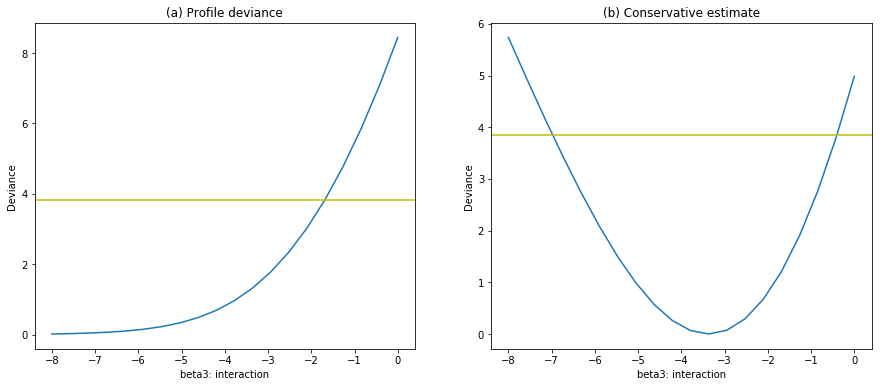

In [71]:
## EX 6-15

manag=[[0,3],[3,4],[50,2],[27,14]];manag=np.array(manag)
city=[0,0,1,1];city=np.array(city)
domest=[0,1,0,1];domest=np.array(domest)
manag1=manag[:,0]
manag2=manag[:,1]
formula='manag1+manag2 ~ domest*city'
data={'manag2': manag2,'manag1': manag1,'domest': domest,'city': city}
df=pd.DataFrame(data)
#regr=smf.glm(formula = formula, data=df, family=sm.families.Binomial())
#result=regr.fit()
#print(result.summary())
#print('Deviance of multiplicative model=',result.deviance,'\n')

formula='manag1+manag2 ~ domest+city'
regr=smf.glm(formula = formula, data=df, family=sm.families.Binomial())
result=regr.fit()
print(result.summary())

print('Deviance of additive model=',result.deviance,'\n')


theta=np.linspace(-8,0,20)
i=0;dev=np.zeros(len(theta))
formula='manag1+manag2 ~ domest+city'
for a in theta:
  inter=a*domest*city
  df['inter']=inter
  regrr=smf.glm(formula = formula, data=df, offset=df['inter'], family=sm.families.Binomial())
  dev[i]=regrr.fit().deviance
  i+=1


# plots
fig, ((ax1, ax2)) = plt.subplots(nrows=1,ncols=2,figsize=(15,6))

ax1.plot(theta,dev)
ax1.set(xlabel="beta3: interaction", ylabel="Deviance",title="(a) Profile deviance")
ax1.axhline(y=3.84, color='y')

# ..........   conservative analysis: changing 0 to 1

manag11=manag1
manag11[0]=1
i=0;dev1=np.zeros(len(theta))
formula='manag11+manag2 ~ domest+city'
data1={'manag2': manag2, 'manag11': manag11,'domest': domest,'city': city}
df1=pd.DataFrame(data1)
for a in theta:
  inter=a*domest*city
  df1['inter']=inter
  regr=smf.glm(formula = formula, data=df1, offset=df1['inter'], family=sm.families.Binomial())
  dev1[i]=regr.fit().deviance
  i+=1

ax2.plot(theta,dev1)
ax2.set(xlabel="beta3: interaction", ylabel="Deviance",title="(b) Conservative estimate")
ax2.axhline(y=3.84, color='y')

formula0='manag11+manag2 ~ domest*city'
regr0=smf.glm(formula = formula0, data=df1, family=sm.families.Binomial())

res=regr0.fit()
print(res.params[3])

# normal approximation:
nlike=norm.pdf(theta,res.params[3],res.bse[3])
wilk=2*(np.max(np.log(nlike)) - np.log(nlike))
ax2.plot(theta,wilk)


In [84]:
# EX 6-15
age = [18, 20,	22,	23,	23,	24,	24,	25,	25,	27,	28,	28,	28,	29,	30,	30,	30,
       30,	31,	31,	32,	33,	33,	33,	34,	34,	34,	35,	35,	35,	37,	37,	37,	39,	40]
age = np.array(age)
claim = [0,	1,	1,	0,	0,	0,	1,	0,	5,	0,	1,	2,	2,	4,	2,	1,	3,
         1,	0,	3,	4,	2,	0,	1,	2,	3,	0,	1,	2,	1,	2,	5,	1,	2,	4]
claim = np.array(claim)
age0 = [-12.1142857,	-10.1142857,	-8.1142857,	-7.1142857,	-7.1142857,	-6.1142857,	-6.1142857,	-5.1142857,	-5.1142857,	-3.1142857,	-2.1142857,
        -2.1142857,	-2.1142857,	-1.1142857,	-0.1142857,	-0.1142857,	-
        0.1142857,	-0.1142857,	0.8857143,	0.8857143,	1.8857143,	2.8857143,
        2.8857143,	2.8857143,	3.8857143,	3.8857143,	3.8857143,	4.8857143,	4.8857143,	4.8857143,	6.8857143,	6.8857143,	6.8857143,
        8.8857143,	9.8857143]
age0 = np.array(age0)
n = len(age)

# IWLS

X = np.ones((n, 2))
X[:, 1] = age0
bt = np.array([np.log(np.mean(claim)), 0])  # starting value

for i in range(1, 5):
    Xbt = X @ bt
    mu = np.exp(Xbt)
    Y = Xbt+(claim-mu)/mu
    S = 1/mu  # !! this is a vector of variances, no need to turn it into a matrix
    XS = X.transpose()*(S**(-1))
    XSX = XS @ X
    XSY = XS @ Y
    bt = np.linalg.inv(XSX) @ XSY
    print('iteration = ', i, ', betahat =', bt, '\n')


print('Covariance matrix of betahat', '\n')
print(np.linalg.inv(XSX))
se2 = np.diag(np.linalg.inv(XSX))
print('standard errors of betahat=', np.sqrt(se2), '\n')

# for comparison
print('From GLM run:', '\n')
formula = 'claim~age0'
data = {'claim': claim, 'age0': age0}
df = pd.DataFrame(data)
regr = smf.glm(formula=formula, data=df, family=sm.families.Poisson())
result = regr.fit()
print(result.summary())


iteration =  1 , betahat = [0.48770321 0.0620757 ] 

iteration =  2 , betahat = [0.42761843 0.06601483] 

iteration =  3 , betahat = [0.42550055 0.0662597 ] 

iteration =  4 , betahat = [0.42549749 0.06626019] 

Covariance matrix of betahat 

[[ 0.01985291 -0.00125968]
 [-0.00125968  0.0006872 ]]
standard errors of betahat [0.14090036 0.02621449] 

From GLM run: 

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  claim   No. Observations:                   35
Model:                            GLM   Df Residuals:                       33
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -55.853
Date:                Sat, 10 Sep 2022   Deviance:                       45.062
Time:                        19:49:01   Pearson chi2:                     43.4
N

Coefficients: 
 231.443122157297 [-84.95701556   8.47274356]


[Text(0,0.5,'Sulphur dioxide'),
 Text(0.5,0,'Industries'),
 Text(0.5,1,'(b) Transform x-axis')]

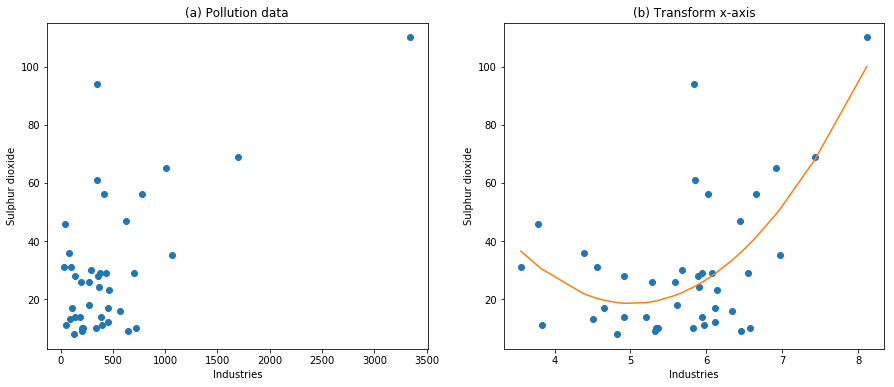

In [101]:
# Example 6.18a: to produce Figure 6.8 and the first table 
# in page 180

#Y	SO2 content of air in micrograms per cubic metre
#X1	Average annual temperature in oF
#X2	Number of manufacturing enterprises employing 20 or more workers
#X3	Population size (1970 census); in thousands
#X4	Average annual wind speed in miles per hour
#X5	Average annual precipitation in inches
#X6	Average annual of days with precipitation per year

x=[35,	44,	46,	80,	91,	96,	104,	125,	136,	137,	181,	197,	204,	207,	213,	266,	275,	291,	337,	343,	347,	361,	368,	379,	381,	391,	412,
434,	453,	454,	462,	569,	625,	641,	699,	721,	775,	1007,	1064,	1692,	3344];x=np.array(x)
y=[31,	46,	11,	36,	13,	31,	17,	8,	14,	28,	14,	26,	9,	10,	10,	26,	18,	30,	10,	94,	61,	28,	24,	29,	14,	11,	56,	29,	12,	17,	23,	16,	47,
9,	29,	10,	56,	65,	35,	69,	110];y=np.array(y)

# plots
fig, ((ax1, ax2)) = plt.subplots(nrows=1,ncols=2,figsize=(15,6))

ax1.plot(x,y,marker='o',ls='')
ax1.set(xlabel="Industries", ylabel="Sulphur dioxide",title="(a) Pollution data")
#ax1.axhline(y=3.84, color='y')

lx=np.log(x)
lx2=lx**2

lx=lx.reshape(-1,1)
lx2=lx2.reshape(-1,1)
LX=np.hstack((lx,lx2))
y=y.reshape(-1,1)
regr = linear_model.LinearRegression()
regr.fit(LX, y)

print("Coefficients: \n", regr.intercept_[0], regr.coef_[0])

ax2.plot(np.log(x),y,marker='o',ls='')
ax2.plot(np.log(x),regr.predict(LX))
ax2.set(xlabel="Industries", ylabel="Sulphur dioxide",title="(b) Transform x-axis")


Coefficients: 
 8.141511880831265 [-2.08960723  0.2073451 ]


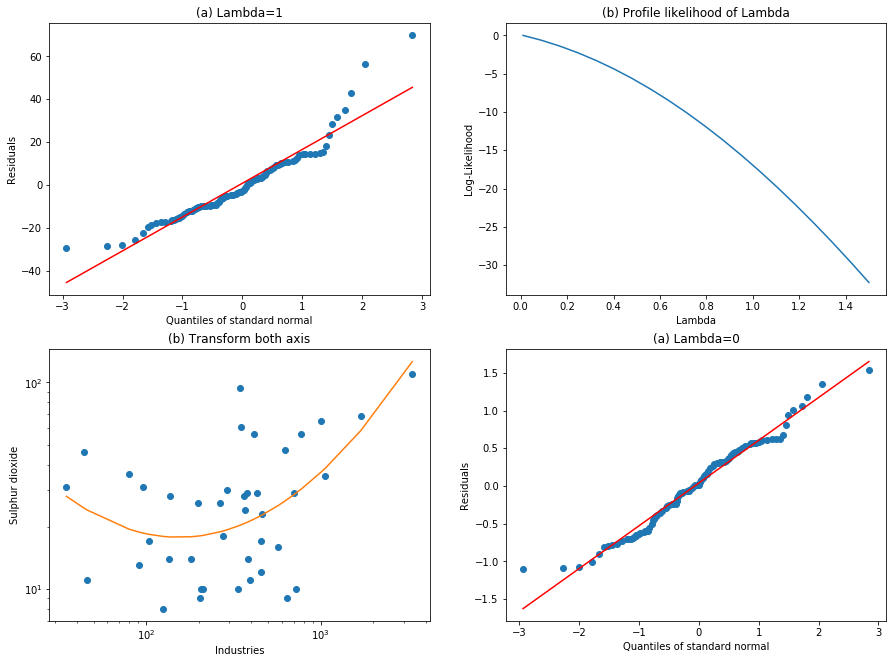

In [136]:
## EX 6.18b

# plots
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(nrows=2,ncols=2,figsize=(15,11))

qn_x = np.percentile(-(regr.predict(LX)-y).flatten(), percs)
ax1.plot(qn_norm,qn_x, ls="", marker="o")
ax1.set(xlabel="Quantiles of standard normal", ylabel="Residuals",title="(a) Lambda=1")
qqline(ax1, "r",qn_norm,qn_x)

# finding lambda-hat
ll=[]
nl=20
n=len(y)
lamb=np.linspace(.01,1.5,nl)
for i in range(0,nl):
  yl=(y**lamb[i]-1)/lamb[i]
  modelpoly=np.poly1d(np.polyfit(lx.flatten(), yl.flatten(), 3))
  sl2=np.sum((modelpoly(lx.flatten())-yl)**2)/(n-3)
  lli = -n/2*np.log(sl2) + (lamb[i]-1)*np.sum(np.log(y))
  ll.append(lli)

ll=ll-np.max(ll)

ax2.plot(lamb,ll)
ax2.set(xlabel="Lambda", ylabel="Log-Likelihood",title="(b) Profile likelihood of Lambda")

lmax=np.max(lamb[ll==np.max(ll)])

regrlog = linear_model.LinearRegression()
regrlog.fit(LX, np.log(y))
print("Coefficients: \n", regrlog.intercept_[0], regrlog.coef_[0])

ax3.plot(x,y,marker='o',ls='')
ax3.plot(x,np.exp(regrlog.predict(LX)))
ax3.set(xlabel="Industries", ylabel="Sulphur dioxide",title="(b) Transform both axis")
ax3.set_yscale('log');ax3.set_xscale('log')

qn_x = np.percentile(-(regrlog.predict(LX)-np.log(y)).flatten(), percs)
ax4.plot(qn_norm,qn_x, ls="", marker="o")
ax4.set(xlabel="Quantiles of standard normal", ylabel="Residuals",title="(a) Lambda=0")
qqline(ax4, "r",qn_norm,qn_x)

Coefficients: 
 -44.132024699750744 1.0203093133922503
Normal AIC=  160.26072836430157  

Cauchy-based estimates for beta0, beta1, sigma [-41.37168561   0.97435412   1.27989472] 

Cauchy AIC=  115.49338632841204 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     104.2
Date:                Thu, 15 Sep 2022   Prob (F-statistic):           3.77e-09
Time:                        19:29:42   Log-Likelihood:                -58.369
No. Observations:                  21   AIC:                             120.7
Df Residuals:                      19   BIC:                             122.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                      

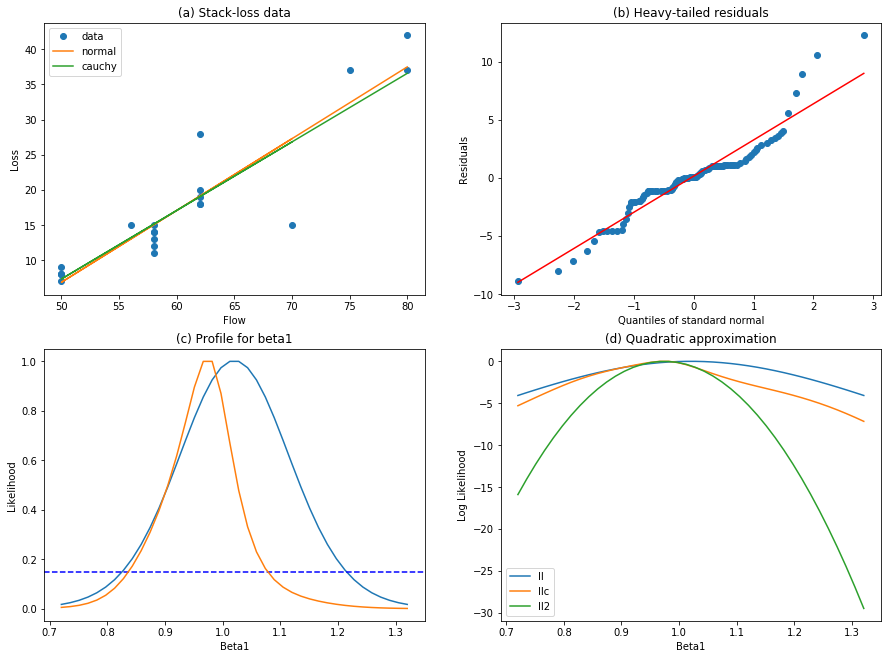

In [208]:
# EX 6.19: stack loss versus air flow

y=[42,	37,	37,	28,	18,	18,	19,	20,	15,	14,	14,	13,	11,	12,	8,	7,	8,	8,	9,	15,	15];y=np.array(y)
x=[80,	80,	75,	62,	62,	62,	62,	62,	58,	58,	58,	58,	58,	58,	50,	50,	50,	50,	50,	56,	70];x=np.array(x)
n=len(x)
x0=x-np.mean(x)

x=x.reshape(-1,1)
y=y.reshape(-1,1)
regr = linear_model.LinearRegression()
regr.fit(x, y)

print("Coefficients: \n", regr.intercept_[0], regr.coef_[0][0])

# plots
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(nrows=2,ncols=2,figsize=(15,11))

ax1.plot(x,y, ls="", marker="o")
ax1.plot(x,regr.predict(x))
ax1.set(xlabel="Flow", ylabel="Loss",title="(a) Stack-loss data")

# log-likelihood:
bo=regr.intercept_[0]
b1=regr.coef_[0][0]
sigma=np.sum((y-regr.predict(x))**2)/n
mu=bo+b1*x
aic=-2*np.sum(np.log(norm.pdf(y,mu,sigma))) + 6  # normal model
print('Normal AIC= ', aic, ' \n')

def fun1(p):
  bo=p[0];b1=p[1];sigma=p[2]
  mu=bo+b1*x
  return -np.sum(np.log(cauchy.pdf(y,mu,sigma)))  # cauchy model


ams=minimize(fun1,[-44,1,1])
print('Cauchy-based estimates for beta0, beta1, sigma',ams.x,'\n')
print('Cauchy AIC= ',(2*ams.fun+6),'\n')

mu=ams.x[0] + ams.x[1] * x
ax1.plot(x,mu)
ax1.legend(['data','normal','cauchy'])

qn_x = np.percentile((regr.predict(x)-y).flatten(), percs)
ax2.plot(qn_norm,qn_x, ls="", marker="o")
ax2.set(xlabel="Quantiles of standard normal", ylabel="Residuals",title="(b) Heavy-tailed residuals")
qqline(ax2,"r",qn_norm,qn_x)

xsm = sm.add_constant(x)
model = sm.OLS(y,xsm)
result = model.fit()
print(result.summary())

b1hat=b1
se=result.bse[1]
bb1=np.linspace(b1hat-3*se,b1hat+3*se,40)

def fun2(b1):
  bo=np.mean(y) - b1*np.mean(x)
  return -n/2*np.log(np.sum((y-bo-b1*x)**2))

ll=[]
for b1 in bb1:
  ll.append(fun2(b1))

ll=ll-np.max(ll)
like=np.exp(ll-np.max(ll))

ax3.plot(bb1,like)
ax3.set(xlabel="Beta1", ylabel="Likelihood",title="(c) Profile for beta1")
ax3.axhline(y=0.15, color='b', linestyle='--')


def fun1(p):
  bo=p[0]
  sigma=p[1]
  mu=bo+b1*x0
  return -np.sum(np.log(cauchy.pdf(y.flatten(),mu,sigma)))  # cauchy model

llc=[]
for b1 in bb1:
  lli=minimize(fun1,[17,1], method = 'Nelder-Mead') # not working
  llc.append(lli.fun)

llc=np.min(llc)-llc
likec=np.exp(llc)

ax3.plot(bb1,likec)

info=-np.diff(np.diff(llc))/(bb1[1]-bb1[0])**2
aa=bb1[1:39]
int_f=interpolate.interp1d(aa,info)
info_out=int_f(0.97)
sec=np.sqrt(1/info_out)
print('Standard errors of beta0-hat and beta1-hat',se,sec,'\n')

ll2=(-1/2/sec**2)*(bb1-ams.x[1])**2

ax4.plot(bb1,ll)
ax4.plot(bb1,llc)
ax4.plot(bb1,ll2)
ax4.set(xlabel="Beta1", ylabel="Log Likelihood",title="(d) Quadratic approximation")
ax4.legend(['ll','llc','ll2'])
